# Introduction to supervised learning 

## Simple (univariate) linear regression

Imagine the simplest linear model where the dependent variable $y$ is
assumed to be an affine function of the explanatory variable $x$
and an error term $\epsilon$, given by
$$
y_i = \alpha + \beta x_i + \epsilon_i
$$
for each observation $i$.
In econometrics, the parameters $\alpha$ and $\beta$ are called the intercept and
slope parameters, respectively. In machine learning, the terminology
often differs and you might see a simple linear model written like
$$
y_i = b + w x_i + \epsilon_i
$$
where $b$ is called the *bias* and $w$ is called a *weight*. 

Our goal is to estimate the parameters $\alpha$ and $\beta$ which is
most commonly done by ordinary least squares (OLS). OLS is defined as the
estimator that finds the estimates $(\widehat{\alpha}, \widehat{\beta})$
such that the sum of squared errors is minimized,
$$
L(\alpha, \beta) = \frac{1}{N}
    \sum_i^N \Bigl(y_i - \alpha - \beta x_i \Bigr)^2
$$
where $L$ is the loss function that depends on the choice of parameters. Note that
we use the "hat" notation $\widehat{\alpha}$ to distinguish the OLS
estimate from the (usually unknown) true parameter $\alpha$. The exact
values of $\widehat{\alpha}$ and $\widehat{\beta}$ will vary depending the sample 
size and estimator used as we will see later in this unit.

For this simple model, the estimates are given by the expressions
$$
\begin{aligned}
\widehat{\beta} &= \frac{\widehat{Cov}(y,x)}{\widehat{Var}(x)} \\
\widehat{\alpha} &= \overline{y} - \widehat{\beta} \overline{x}
\end{aligned}
$$
where $\widehat{Cov}(\bullet,\bullet)$ and $\widehat{Var}(\bullet)$ are the *sample* covariance and
variance, respectively, and $\overline{y}$ and $\overline{x}$ are the sample
means of $y$ and $x$. 

There is a straightforward generalization to
the multivariate setting where we have a vector $\mathbf{x}_i$ of explanatory variables 
(which usually include the intercept) and a parameter vector
$\mathbf{\beta}$ so that the model is given by
$$
y_i = \mathbf{x}_i'\mathbf{\beta} + \epsilon_i
$$
If we stack all $\mathbf{x}_i$ in the matrix $\mathbf{X}$ and all $y_i$ in 
the vector $\mathbf{y}$, the OLS estimate 
of $\mathbf{\beta}$ is given by the well-known formula
$$
\widehat{\mathbf{\beta}} = \left(\mathbf{X}'\mathbf{X}\right)^{-1} \mathbf{X}'\mathbf{y}
$$

However, we will not be estimating linear regressions based on this formula and you should never attempt this, as naively implementing such matrix operations can lead to numerical problems. Instead, always use pre-packaged least-squares solvers such as those implemented in NumPy's [`lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) or
SciPy's [`lstsq()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)
functions. 
For econometrics and machine learning, it usually makes sense to use linear regression models such as those implemented in 
[`statsmodels`](https://www.statsmodels.org/stable/regression.html) or
[`scikit-learn`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html),
which is what we turn to next.

### Univariate linear regressions with scikit-learn

We start by fitting the simple linear model
$$
y_i = \alpha + \beta x_i + \epsilon_i
$$
using `scikit-learn`. For now, we proceed using synthetically generated data where we know the true relationship, assuming that
$$
\begin{aligned}
y_i &= 1 + \frac{1}{2} x_i + \epsilon_i \\
\epsilon &\stackrel{\text{iid}}{\sim} N(0, 0.7^2)
\end{aligned}
$$
so that the true parameters are $\alpha = 1$ and $\beta = \frac{1}{2}$. The error term $\epsilon$ is assumed to be normally distributed with mean $0$ and variance $0.7^2 = 0.49$.
Note that it is customary to specify the normal distribution in terms of its variance (here $0.49$), but most NumPy and SciPy functions expect the standard deviation (here $0.7$) to be passed as the scale parameter of a normal distribution.

We generate a sample of $N=30$ observations as follows:

In [1]:
import numpy as np
from numpy.random import default_rng

rng = default_rng(123)

# Number of observations
N = 30

# True parameters
alpha = 1.0
beta = 0.5

# Use x that are uniformly spaced on [0, 10]
x = np.linspace(0, 10, N)
# Normally distributed errors
epsilon = rng.normal(scale=0.7, size=N)
# Create outcome variable
y = alpha + beta * x + epsilon

To fit a linear model, we use the 
[`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class provided by `scikit-learn`. Before doing so, we need to import it from `sklearn.linear_model`.
Note that most fitting routines in `scikit-learn` expect a *matrix* as opposed to a vector even if the model has only one explanatory variable, so we need to insert an artificial axis to create the matrix `X = x[:, None]`.

In [2]:
from sklearn.linear_model import LinearRegression

# Create LinearRegression object
lr = LinearRegression(fit_intercept=True)

# fit() expects two-dimensional object, convert to N x 1 matrix
X = x[:, None]

# Fit model to data
lr.fit(X, y)

# Predict fitted values
yhat = lr.predict(X)

The following code visualises the sample as a scatter plot of $(x_i, y_i)$ and adds the fitted line (in solid orange). Intuitively, for $x=0$ the fitted line has the value $\widehat{\alpha}$ (the intercept) and its slope is equal to $\widehat{\beta}$. Note that `scikit-learn` models usually store the fitted model parameters in the `coef_` attribute (which is an array even if there is only a single explanatory variable). If the model includes an intercept, its fitted value is stored in the attribute `intercept_`.

Text(0.5, 0.98, 'Univariate linear regression')

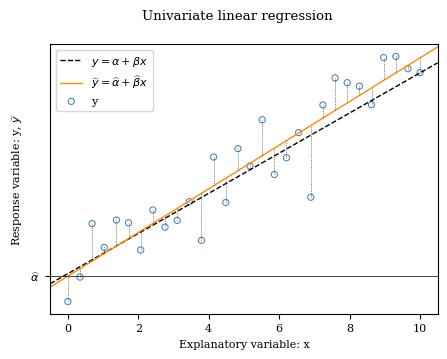

In [3]:
import matplotlib.pyplot as plt

# Extract parameter estimates from LinearRegression object
alpha_hat = lr.intercept_
beta_hat = lr.coef_[0]

fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

# Plot true relationship
ax.axline((0.0, alpha), slope=beta, lw=1.0, ls='--', c='black', 
    label=r'$y = \alpha + \beta x$')

# Plot regression line
ax.axline((0.0, alpha_hat), slope=beta_hat, lw=1.0, c='darkorange', 
    label=r'$\widehat{y} = \widehat{\alpha} + \widehat{\beta} x$')

# Plot raw data
ax.scatter(x, y, s=20, color='none', edgecolor='steelblue', alpha=1.0, 
    lw=0.75, label='y')

# Plot lines connecting true and predicted values for 
# each observation
for i in range(len(x)):
    # Predict yhat for given x_i
    yhat_i = alpha_hat + beta_hat * x[i]
    ax.plot([x[i], x[i]], [y[i], yhat_i], lw=0.5, ls=':', 
        c='black', alpha=0.9)

# Add annotations
ax.set_xlabel('Explanatory variable: x')
ax.set_ylabel(r'Response variable: y, $\widehat{y}$')
ax.axhline(alpha_hat, lw=0.5, c='black')
ax.legend(loc='best')
ax.set_yticks((alpha_hat, ), (r'$\widehat{\alpha}$', ))

fig.suptitle('Univariate linear regression')


The dashed black line shows the true relationship which is known in this synthetic sample, but in general is unknown for real data. For small sample sizes, the true and estimated parameters need not be close as the graph illustrates. The graph also shows the prediction errors as the dotted lines between the sample points $y_i$ and the black fitted model. OLS minimizes the sum of the squares of these distances.

### Training and test samples

In econometrics, we usually emphasise *inference*, i.e., we are interested in testing a hypothesis about the estimated parameter, for example whether it is statistically different from zero. Conversely, in machine learning the emphasis is often on prediction, i.e., our goal is to estimate a relationship from a *training* sample and make predictions for new data. Usually, we use a *test* sample that is different from the training data to assess how well our model is able to predict outcomes for new data which has not been used for estimation.

To demonstrate the use of training and test data sets, we use as simplified variant of the 
[Ames house price data set](https://www.openml.org/d/42165) 
which can be obtained from [openml.org](https://www.openml.org), a repository for free-to-use data suitable for machine learning tasks.

The original data set has 80 features (explanatory variables) which are characteristics of houses in Ames, a city of about 60 thousand inhabitants in the middle of Iowa, USA. The goal is to use these features to predict the house price (or "target" in ML terminology). The above website provides details on all 80 features, but we restrict ourselves to a small subset.

We could download the data set directly from [openml.org](https://www.openml.org) using `scikit-learn` as follows:
```python
    from sklearn.datasets import fetch_openml
    ds = fetch_openml(name='house_prices')

    X = ds.data         # Get features (explanatory variables)
    y = ds.target       # get dependent variable
```
which returns an object with various information about the data set. The features are stored in the `data` attribute, while the dependent variable is stored in the `target` attribute.

Instead, we will use a local copy of the simplified data set which contains only a subset of 12 features that are slightly adapted for our purposes.

In [4]:
# Uncomment this to use files in the local data/ directory
DATA_PATH = '../data'

# Load data directly from GitHub (for Google Colab)
# DATA_PATH = 'https://raw.githubusercontent.com/richardfoltyn/python-intro-PGR/main/data'

In [5]:
import pandas as pd

file = f'{DATA_PATH}/ames_houses.csv'
df = pd.read_csv(file)

# List columns present in DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SalePrice         1460 non-null   float64
 1   LotArea           1460 non-null   float64
 2   Neighborhood      1460 non-null   object 
 3   BuildingType      1386 non-null   object 
 4   OverallQuality    1460 non-null   int64  
 5   OverallCondition  1460 non-null   int64  
 6   YearBuilt         1460 non-null   int64  
 7   CentralAir        1460 non-null   object 
 8   LivingArea        1460 non-null   float64
 9   Bathrooms         1460 non-null   int64  
 10  Bedrooms          1460 non-null   int64  
 11  Fireplaces        1460 non-null   int64  
 12  HasGarage         1460 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 148.4+ KB


In this section, we focus on the columns `SalePrice` which contains the house price in US dollars and `LivingArea` which contains the living area in $m^2$ for each house in the sample. To get some intuition for the data, we look at some descriptive statistics:

In [6]:
df[['SalePrice', 'LivingArea']].describe()

,SalePrice,LivingArea
count,1460.000000,1460.000000
mean,180921.195890,140.777444
std,79442.502883,48.813961
min,34900.000000,31.026587
25%,129975.000000,104.923743
50%,163000.000000,135.996777
75%,214000.000000,165.049367
max,755000.000000,524.107798


For our analysis, we convert the `DataFrame` columns to NumPy arrays because `scikit-learn` was not programmed to work with pandas `DataFrames`:

In [7]:
features = ['LivingArea']
target = 'SalePrice'

# Convert DataFrame to NumPy arrays
y = df[target].to_numpy()
X = df[features].to_numpy()

#### Manually creating training and test samples

We next want to split the data set intro training and test sub-samples. We do this by randomly selecting a desired fraction of the data to be part of the training sample and assign the rest to the test sample. For this example, we assign 10% of observations to the test sample and the remainder to the training data set. Once we have randomly allocated 90% of observations to the training data set, we use the function 
[`setdiff1()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html) 
to find the complementary test sample. This function returns the set difference of two one-dimensional arrays, i.e., all array elements from the first argument that are *not* present in the second array.

In [8]:
import numpy as np
from numpy.random import default_rng

rng = default_rng(123)

# sample size
N = len(y)

# fraction of data used for test sample
test_size = 0.1

# training and test sample sizes
N_test = int(N * test_size)
N_train = N - N_test

# Randomly assign observations to training samples
itrain = rng.choice(np.arange(N), size=N_train, replace=False)
# Test sample is complement of training sample
itest = np.setdiff1d(np.arange(N), itrain)

# Select training sample
X_train = X[itrain]
y_train = y[itrain]

# Select test sample
X_test = X[itest]
y_test = y[itest]

Once we have split the sample, we estimate the model on the training sample.

In [9]:
from sklearn.linear_model import LinearRegression

# Fit model on training sample
lr = LinearRegression()
lr.fit(X_train, y_train)

print('Regression coefficients')
print(f'  Intercept: {lr.intercept_:.1f}')
print(f'  Slope: {lr.coef_[0]:.1f}')

Regression coefficients
  Intercept: 20675.0
  Slope: 1133.9


The fitted coefficients show that for each additional square meter of living area, the sale price on average increases by $1,134.

The following code creates a scatter plot showing the training and test samples and adds the fitted line.

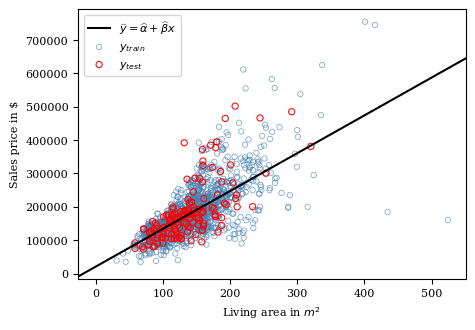

In [10]:
intercept = lr.intercept_
slope = lr.coef_[0]

fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

# Plot regression line
ax.axline((0.0, intercept), slope=slope, lw=1.5, c='black', 
    label=r'$\widehat{y} = \widehat{\alpha} + \widehat{\beta} x$')

# Plot training data
ax.scatter(X_train, y_train, s=15, color='none', edgecolor='steelblue', 
    alpha=0.8, lw=0.5, label=r'$y_{train}$')

# Plot test data
ax.scatter(X_test, y_test, s=20, color='none', edgecolor='red', 
    alpha=1.0, lw=0.75, label=r'$y_{test}$')

# Add annotations
ax.set_xlabel('Living area in $m^2$')
ax.set_ylabel(r'Sales price in $')
ax.legend(loc='best')


Since this is a univariate model, we can also plot the prediction error against the explanatory variable $x$. For this, we first need to compute the predicted values in the test sample and then the prediction error for each observations,
$$
\epsilon_i = y_i - \widehat{y}_i = y_i - \widehat{\alpha} - \widehat{\beta} x_i
$$
for all $i$ that are part of the test sample.

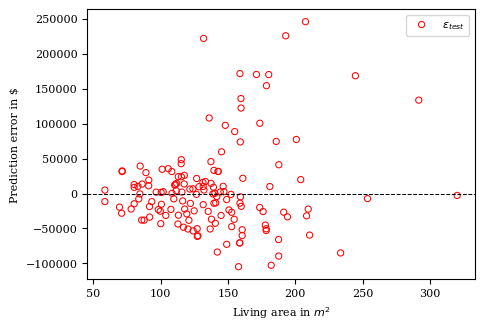

In [11]:
# Predict model for test sample
y_test_hat = lr.predict(X_test)

# Prediction error for test sample
error = y_test - y_test_hat

fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

# Scatter plot of prediction errors
ax.scatter(X_test, error, s=20, color='none', edgecolor='red', 
    alpha=1.0, lw=0.75, label=r'$\epsilon_{test}$')

# Add annotations
ax.set_xlabel('Living area in $m^2$')
ax.set_ylabel(r'Prediction error in $')
ax.legend(loc='best')
ax.axhline(0.0, lw=0.75, ls='--', c='black')

As the graph shows, the errors are reasonably centred around $0$ as we would expect from a model that contains an intercept. However, the error variance seems to be increasing in $x$ which indicates that our model might be missing some explanatory variables.

#### Automatically creating training and test samples

A lot of code was required to create the training and test samples manually. Instead, we can use `scikit-learn`'s
[`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
to considerably simply this task. We need to either specify the `test_size` or `train_size` arguments to determine how the sample should be (randomly) split. The `random_state` argument is used to seed the RNG and get reproducible results.

The following code repeats the sample splitting we performed above using this simpler approach.

In [12]:
from sklearn.model_selection import train_test_split

# fraction of data used for test sample
test_size = 0.1

# Split into training / test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=test_size,        # Fraction used for test sample
    random_state=123            # Seed for random number generator
)

# Fit model on training sample
lr = LinearRegression()
lr.fit(X_train, y_train)

print('Regression coefficients')
print(f'  Intercept: {lr.intercept_:.1f}')
print(f'  Slope: {lr.coef_[0]:.1f}')

Regression coefficients
  Intercept: 21364.5
  Slope: 1125.4


Note that the estimated coefficients need not be the same we got when splitting the sample manually. This is because `scikit-learn` uses a different way to randomly allocate the observations to training or test samples, and thus the composition of the training sample will differ.

### Evaluating the model fit

One of the commonly used metrics to evaluate models is the *mean squared error (MSE)*, defined as 
$$
MSE = \frac{1}{N} \sum_{i=1}^N \bigl(y_i - \widehat{y}_i\bigr)^2
$$
which computes the average squared prediction error $y - \widehat{y}$. The magnitude of the MSE is usually hard to interpret, so we often compute the *root mean squared error (RMSE)*,
$$
RMSE = \sqrt{MSE} = \left(\frac{1}{N} \sum_{i=1}^N \bigl(y_i - \widehat{y}_i\bigr)^2 \right)^{\frac{1}{2}}
$$
which can be interpreted in units of the response variable $y$. Lastly, another measure of a model's fit is the
*coefficients of determination* or $R^2$, which is a normalized version of the MSE and usually takes on values between $[0,1]$. The $R^2$ is defined as 
$$
R^2 = 1 - \frac{MSE}{\widehat{Var}(y)}
$$
where $\widehat{Var}(y)$ is the sample variance of the response $y$.
Intuitively, an $R^2$ of 1 means that the model predicts the response for each observation perfectly (which is unlikely),
whereas an $R^2$ of 0 implies that the model possesses no explanatory power relative to a model that includes only the sample mean. Note that in a test sample, the $R^2$ could even be negative.

While these measures are easy to implement ourselves, we can just as well use the functions provided in `scikit-learn.metrics` to do the work for us: [`mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) for the MSE and
[`r2_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)
for the $R^2$.

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute predicted values for test sample
y_test_hat = lr.predict(X_test)

# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_test_hat)

# Coefficient of determination (R²)
r2 = r2_score(y_test, y_test_hat)

print(f'Mean squared error: {mse:.1f}')
print(f'Root mean squared error {np.sqrt(mse):.1f}')
print(f'Coefficient of determination (R^2): {r2:.2f}')


Mean squared error: 2821058288.6
Root mean squared error 53113.6
Coefficient of determination (R^2): 0.58


Since we estimated a model with intercept, the $R^2 = 0.58$ implies that the model explains 58% of the variance in the test sample.

***
## Multivariate linear regression

### Data with several explanatory variables

Multivariate (or multiple) linear regression extends the simple model to multiple explanatory variables or regressors. To illustrate, we'll load the Ames housing data again but use several (continuous) explanatory variables.

In [14]:
# Uncomment this to use files in the local data/ directory
DATA_PATH = '../data'

# Load data directly from GitHub (for Google Colab)
# DATA_PATH = 'https://raw.githubusercontent.com/richardfoltyn/python-intro-PGR/main/data'

In [15]:
import pandas as pd

# Load data from CSV file
file = f'{DATA_PATH}/ames_houses.csv'
df = pd.read_csv(file)

# Print info about columns contained in DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SalePrice         1460 non-null   float64
 1   LotArea           1460 non-null   float64
 2   Neighborhood      1460 non-null   object 
 3   BuildingType      1386 non-null   object 
 4   OverallQuality    1460 non-null   int64  
 5   OverallCondition  1460 non-null   int64  
 6   YearBuilt         1460 non-null   int64  
 7   CentralAir        1460 non-null   object 
 8   LivingArea        1460 non-null   float64
 9   Bathrooms         1460 non-null   int64  
 10  Bedrooms          1460 non-null   int64  
 11  Fireplaces        1460 non-null   int64  
 12  HasGarage         1460 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 148.4+ KB


Compared to our earlier analysis, we'll now add the lot area (in $m^2$) as a feature to the model, which is thus given by
$$
SalePrice_i = \alpha + \beta_0 LivingArea_i + \beta_1 LotArea_i + \epsilon_i
$$

We first inspect the descriptive statistics of the newly added explanatory variable to get some idea about its distribution.

In [16]:
df[['SalePrice', 'LivingArea', 'LotArea']].describe()

,SalePrice,LivingArea,LotArea
count,1460.000000,1460.000000,1460.000000
mean,180921.195890,140.777444,976.949947
std,79442.502883,48.813961,927.199358
min,34900.000000,31.026587,120.762165
25%,129975.000000,104.923743,701.674628
50%,163000.000000,135.996777,880.495526
75%,214000.000000,165.049367,1077.709432
max,755000.000000,524.107798,19994.963289


As before, we convert the `DataFrame` columns to NumPy arrays, split the data into training and test samples and estimate a linear model.

In [17]:
features = ['LivingArea', 'LotArea']
target = 'SalePrice'

y = df[target].to_numpy()
X = df[features].to_numpy()

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.3, random_state=123)

lr = LinearRegression()
lr.fit(X_train, y_train)

print(f'Intercept: {lr.intercept_}')
print(f'Coefficients: {lr.coef_}')

Intercept: 20025.027199480886
Coefficients: [1085.68252338    7.09932726]


The coefficient array `coef_` now stores two values, the first one for `LivingArea` and the second one for `LotArea`. These coefficients are in the same order as the features in the feature matrix $\mathbf{X}$ passed when fitting the model.

Since we now have multiple explanatory variables, we can no longer easily plot prediction errors against one feature unless we fix the remaining features at some value or use 3D scatter plots. The latter of course does not help if we have more than two explanatory variables. Instead, we can plot the prediction errors against $y$ which we do below.

Text(0, 0.5, '$y_{test} - \\widehat{y}_{test}$')

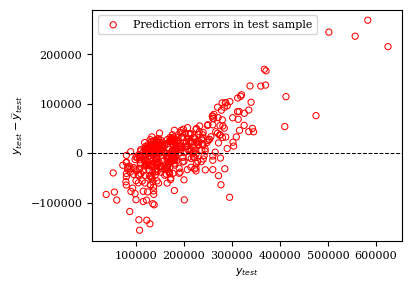

In [19]:
import matplotlib.pyplot as plt

# Predict values in test sample
y_test_hat = lr.predict(X_test)

errors = y_test - y_test_hat

plt.scatter(y_test, errors, s=20, lw=0.75, 
    color='none', edgecolor='red', 
    label='Prediction errors in test sample'
)
plt.axhline(0.0, lw=0.75, ls='--', c='black')
plt.legend()
plt.xlabel(r'$y_{test}$')
plt.ylabel(r'$y_{test} - \widehat{y}_{test}$')

The scatter plot indicates that the prediction errors differ systematically for different levels of $y$. The model on average overpredicts the sale price for low $y$ (hence the error is negative) and underpredicts the price for large $y$ (hence the error is positive).

### Creating polynomial features

Instead of including additional explanatory variables, we can also create additional terms that are functions of variables. The most common way to do this is to include a polynomial in $x$ (or polynomials in multiple explanatory variables). Thus a simple model could be turned into a model with several terms such as
$$
y_i = \alpha + \beta_0 x_i + \beta_1 x_i^2 + \beta_2 x_i^3 + \epsilon_i
$$
where $y$ is modelled as a cubic polynomial in $x$. Note that this model is still called *linear* despite the fact that the mapping between $x$ and $y$ is obviously *non-linear*. However, what matters for estimation is that the model is linear in the model parameters $(\alpha, \beta_0, \beta_1, \beta_2)$. Linear models are thus quite flexible since they can include almost arbitrary non-linear transformations of explanatory and response variables.

To illustrate, we extend the previous model which included `LivingArea` and `LotArea` to now include a polynomial of degree 2 in both variables (often the terms "degree" and "order" are used interchangeably, so this might be called a 2nd-order polynomial). Specifically, if we have two variables $x$ and $z$, such a polynomial would include all terms with exponents summing up to 2 or less:
$$
p(x,z) = \beta_0 + \beta_1 x + \beta_2 z + \beta_3 x^2 + \beta_4 x \cdot z + \beta_5 z^2
$$
We can use these six terms as explanatory variables in our linear models and estimate the parameters $\beta_0,\dots,\beta_5$.

It would be quite error-prone to create such polynomials ourselves, so we are going to use `scikit-learn`'s 
[`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class to accomplish this tasks. As the name implies, this transformation creates new features that are polynomials of a given input matrix.
We can request that the resulting data should include an intercept ("bias") by specifying `include_bias=True`. Note that if an intercept is included in the feature matrix, we should fit the linear model *without* an intercept (by specifying `fit_intercept=False`) as otherwise the model would contain two constant terms.

In [20]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomials of degree 2 or less, including an intercept (bias)
poly = PolynomialFeatures(degree=2, include_bias=True)
Xpoly_train = poly.fit_transform(X_train)

# print polynomial exponents
poly.powers_

array([[0, 0],
       [1, 0],
       [0, 1],
       [2, 0],
       [1, 1],
       [0, 2]])

We can use the `powers_` attribute to get a list of exponents for each generated feature. The above output tells us that the first feature was constructed as $\mathbf{X}_{(1)}^0 + \mathbf{X}_{(2)}^0$ since the first row of exponents is `[0, 0]` and is thus the intercept, while the second feature is given by 
$\mathbf{X}_{(1)}^1 + \mathbf{X}_{(2)}^0 = \mathbf{X}_{(1)}$, where the notation $\mathbf{X}_{(i)}$ refers to the $i$-th column of the input matrix $\mathbf{X}$.

Now that we have transformed the input matrix $\mathbf{X}$, we can estimate the linear model on the expanded feature matrix as before (adding `fit_intercept=False`):

In [21]:
lr = LinearRegression(fit_intercept=False)
lr.fit(Xpoly_train, y_train)

print(f'Intercept: {lr.intercept_}')
print(f'Coefficients {lr.coef_}')

Intercept: 0.0
Coefficients [-2.19724359e+04  1.24027918e+03  5.75108671e+01  3.95841742e-01
 -2.46346339e-01 -3.77428502e-04]


The fitted model has 6 coefficients and the intercept is 0 as the `LinearRegression` model did not explicitly included one.

As earlier, we can plot the prediction errors as a function of the response variable. Before doing this, it is crucial to also transform the original explanatory variables in the test data set using the same polynomial transformation. We can achieve this by using the `transform()` method of the `poly` object we stored from earlier.

Text(0, 0.5, '$y_{test} - \\widehat{y}_{test}$')

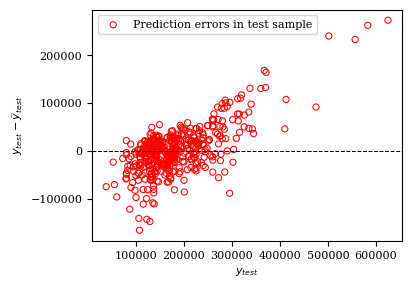

In [22]:
import matplotlib.pyplot as plt

# Predict values in test sample, applying the same polynomial to 
# explanatory variables in test sample.
Xpoly_test = poly.transform(X_test)
y_test_hat = lr.predict(Xpoly_test)

# Compute prediction errors
errors = y_test - y_test_hat

plt.scatter(y_test, errors, s=20, lw=0.75, 
    color='none', edgecolor='red', 
    label='Prediction errors in test sample'
)
plt.axhline(0.0, lw=0.75, ls='--', c='black')
plt.legend()
plt.xlabel(r'$y_{test}$')
plt.ylabel(r'$y_{test} - \widehat{y}_{test}$')

### Using scikit-learn pipelines

As you just saw, additional transformation steps before fitting the model can be tedious and error-prone (we might, for example, forget to transform the test data before computing predictions for the test sample). For this reason, `scikit-learn` implements a feature called pipelines which allows us to combine multiple transformations and a final estimation step. For this to work, all steps in the pipeline except for the last must support `fit()` and `transform()` methods, and the final step in the pipeline should be an estimator such as `LinearRegression` (for details, see the [section on pipelines](https://scikit-learn.org/stable/modules/compose.html#pipeline) in the `scikit-learn` user guide).

There are two ways to construct a pipeline:

1. Create an instance of the 
    [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) class and specify the steps as name-value pairs.
2. Use the 
    [`make_pipeline()`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) convenience function, which sets a default name for each step.

The first approach requires a list of tuples, where each tuple contains an (arbitrary) name and an object that implements the actions taken at this step. To compose a pipeline that creates polynomial features and fits a linear model to them, we would therefore proceed as follows:

In [23]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2)),
    ('lr', LinearRegression(fit_intercept=False))
])

# visualise pipeline (interactive notebook only)
pipe

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('lr', LinearRegression(fit_intercept=False))])

In an interactive notebook, printing the `pipe` object will generate a visualisation which contains details for each step (some editors such as Visual Studio Code even make this visualisation interactive).
To transform and fit the model in a single call, we simply need to invoke the `fit()` method. For example, using the training data from above, we run

In [24]:
# transform and fit in a single step
pipe.fit(X_train, y_train)

print(f'Coefficients: {pipe.named_steps.lr.coef_}')

Coefficients: [-2.19724359e+04  1.24027918e+03  5.75108671e+01  3.95841742e-01
 -2.46346339e-01 -3.77428502e-04]


The second approach is to construct the pipeline using 
[`make_pipeline()`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html).
For this to work, we only need to pass the objects that constitute the individual steps of a pipeline as follows:

In [25]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    PolynomialFeatures(degree=2), 
    LinearRegression(fit_intercept=False)
)
    
# transform and fit model in single step
pipe.fit(X_train, y_train)

# print default names assigned to each step
pipe.named_steps

{'polynomialfeatures': PolynomialFeatures(),
 'linearregression': LinearRegression(fit_intercept=False)}

The function assigns default names to each step which are printed above (basically, these are just lowercase versions of the class defining a step). These names are occasionally required to retrieve information for a specific step.
To demonstrate that the pipeline generates results that are equivalent to our manual implementation, we conclude this section by recreating the error plot from above.

Text(0, 0.5, '$y_{test} - \\widehat{y}_{test}$')

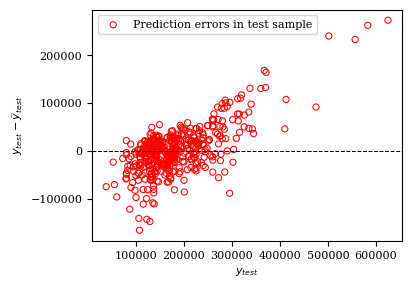

In [26]:
# Predict test responses in a single step. No manual transformation required!
y_test_hat = pipe.predict(X_test)

# Compute prediction errors
errors = y_test - y_test_hat

plt.scatter(y_test, errors, s=20, lw=0.75, 
    color='none', edgecolor='red', 
    label='Prediction errors in test sample'
)
plt.axhline(0.0, lw=0.75, ls='--', c='black')
plt.legend()
plt.xlabel(r'$y_{test}$')
plt.ylabel(r'$y_{test} - \widehat{y}_{test}$')

***
## Optimising hyperparameters with cross-validation

### Outline of hyperparameter tuning

Previously, we discussed some ways to evaluate the model fit (MSE and R²) but did not specify what to to with this information. In this section, we demonstrate how we can use these measures to tune parameters which govern the estimation process, such as the polynomial degree from the previous section. Such parameters are usually called *hyperparameters* to clearly distinguish them from the parameters that are estimated by the model (e.g., the coefficients of a linear model).

Tuning hyperparameters, estimating the model and evaluating its generalisability cannot be done based on the same data set, as these steps then become interdependent (for the same reason we don't want to evaluate the model fit on the training sample as this would lead to overfitting). To this end, in machine learning we often split the data intro *three* parts: the training, validation and test data sets. Models are estimated on the training sample, the choice of hyperparameters is determined based on the validation sample and model generalisability is determined based on the test sample which was not used in estimation or tuning at all.

However, because we might not have enough data to split the sample this way, we usually perform so-called *cross-validation* which is illustrated in the figure below:

1. We split the overall data set into training and test sub-samples. 
2. The training data set is further split into $K$ so-called *folds*.
    1. For each $k = 1,\dots,K$, a smaller training sample is formed by excluding
        the $k$-th fold and estimating the model on the remaining $K-1$ folds.
        We then compute the chosen metric of model fit on the $k$-th fold 
        and store the result.
    2. After cycling through all $K$ folds, we have $K$ values of our desired
        metric, which we then average to get our final measure.
        Hyperparameters are tuned by minimising (or maximising) this averaged
        metric.
    
3.  Once hyperparameter tuning is complete, we evaluate the model on
    the test data set.

![CV split](images/cv_split.svg)

In this unit we will skip the final step of assessing generalisability on the test data set. Consequently, when running cross-validation, we will only use training/validation data sets and we will use the terms "validation" and "test" interchangeably.

The `scikit-learn` 
[documentation](https://scikit-learn.org/stable/modules/cross_validation.html) contains a wealth of additional information on cross-validation. Another method to perform hyperparameter tuning is 
[grid search](https://scikit-learn.org/stable/modules/grid_search.html) 
which we won't cover in this unit.

### Example: Tuning of the polynomial degree

To illustrate the concept, we demonstrate the procedure outlined above by tuning the polynomial degree for the example covered in the previous section by minimising the root mean squared error (RMSE).

We recreate the data set in the same way as before, using `LivingArea` and `LotArea` as explanatory variables.

In [27]:
import pandas as pd

df = pd.read_csv(f'{DATA_PATH}/ames_houses.csv')

features = ['LivingArea', 'LotArea']
target = 'SalePrice'

y = df[target].to_numpy()
X = df[features].to_numpy()

We now iterate over the candidate polynomial degrees $d = 0,\dots,4$ and apply $k$-fold cross-validation with 10 folds. There is no need to manually split the sample into training and validation/test sub-sets. Instead, we use the 
[`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)
class to automatically create the splits for us. Once we have created an instance with the desired number of folds, e.g., `KFold(n_splits=10)`, we can call the `split()` method which iterates trough all possible combinations of training and test data sets and returns the array indices for each.

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

degrees = np.arange(5)

rmse_mean = []

for d in degrees:

    # Create pipeline to transform and fit the model. Pipeline depends
    # on polynomial degree!
    pipe = Pipeline(steps=[
        ('poly', PolynomialFeatures(degree=d, include_bias=True)),
        ('lr', LinearRegression(fit_intercept=False))
    ])

    rmse_fold = []

    # Create 10 folds
    folds = KFold(n_splits=10)

    # Iterate through all combinations of training/test data
    for itrain, itest in folds.split(X, y):

        # Extract training data for this split
        X_train = X[itrain]
        y_train = y[itrain]

        # Extract test (or validation) data for this split
        X_test = X[itest]
        y_test = y[itest]

        # Fit model on training data for given degree
        pipe.fit(X_train, y_train)

        # Predict response on test data
        y_test_hat = pipe.predict(X_test)

        # Compute RMSE as model fit measure: function returns RMSE 
        # if squared=False is passed!
        rmse = mean_squared_error(y_test, y_test_hat, squared=False)

        # Store RMSE for current split
        rmse_fold.append(rmse)

    # Store average MSE for current polynomial degree
    rmse_mean.append(np.mean(rmse_fold))
    
# Convert to NumPy array
rmse_mean = np.array(rmse_mean)

# Print average RMSE for all polynomial degrees
rmse_mean

array([ 79020.25214052,  55268.49840787,  55228.58262438,  55885.05422781,
       437077.00283378])

This code returns an array of 5 averaged RMSEs, one for each $d = 0, \dots, 4$. We can now find the optimal $d$ by picking the one which has the lowest mean squared error in the test samples using the
[`argmin()`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html)
function which returns the *index* of the smallest array element.

In [29]:
# Find index of polynomial degree with smallest RMSE
imin = np.argmin(rmse_mean)

# RMSE-minimising degree
dmin = degrees[imin]

print(f'Polynomial degree with minimum RMSE: {dmin}')

Polynomial degree with minimum RMSE: 2


Finally, it is often instructive to visualise how the RMSE evolves as a function of the hyperparameter we want to tune.

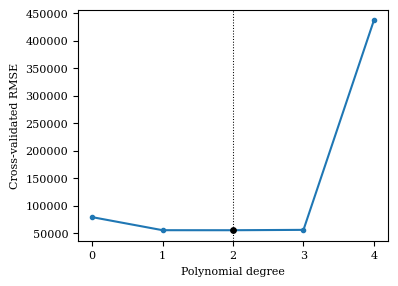

In [30]:
plt.plot(degrees, rmse_mean, marker='o', ms=3)
plt.xlabel('Polynomial degree')
plt.ylabel('Cross-validated RMSE')
plt.scatter(degrees[imin], rmse_mean[imin], s=15, c='black', zorder=100)
plt.xticks(degrees)
plt.axvline(imin, ls=':', lw=0.75, c='black')

Here we see that for $d=0$ (the intercept-only model), the model underfits the data leading to a high prediction error. However, higher $d$'s do not always translate into a better fit. For $d = 4$, the model vastly overfits the data, resulting in poor performance in the test sample and a very large RMSE.

#### Automating cross-validation

The code implemented above to run cross-validation was needlessly complex even though we leveraged the `KFold` class to do the sample splitting for us. Fortunately, `scikit-learn` provides us with even more convenience functions that further simplify this process.
For example, if we want to perform tuning based on a single score (such as the root mean squared error), we can instead use 
[`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). This function requires us to specify an estimator (or a pipeline), the number of folds to use for cross-validation (`cv=10`)
and the metric to evaluate. For example, if we want to compute the RMSE, we would pass the argument 
`scoring='neg_root_mean_squared_error'`. Note that the function returns the *negative* RMSE which we need to correct manually.

See the 
[documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
for a complete list of valid metrics that can be passed as `scoring` arguments. Alternatively, `scikit-learn` lists available metrics by running

```python
import sklearn.metrics
sklearn.metrics.get_scorer_names()
```

The following code re-implements the k-fold cross-validation from earlier
using `cross_val_score()`:

In [31]:
from sklearn.model_selection import cross_val_score

degrees = np.arange(5)

rmse_mean = []
rmse_std = []

for d in degrees:

    pipe = Pipeline(steps=[
        ('poly', PolynomialFeatures(degree=d, include_bias=True)),
        ('lr', LinearRegression(fit_intercept=False))
    ])

    score = cross_val_score(
        pipe, 
        X, y, 
        scoring='neg_root_mean_squared_error', 
        cv=10
    )

    # Function returns NEGATIVE RMSE, correct this here!
    rmse_mean.append(np.mean(-score))
    
# Convert to NumPy array
rmse_mean = np.array(rmse_mean)

# Print average RMSE for all polynomial degrees
rmse_mean

array([ 79020.25214052,  55268.49840787,  55228.58262438,  55885.05422781,
       437077.00283378])

The RMSE-minimising degree is of course the same as before:

In [32]:
imin = np.argmin(rmse_mean)
dmin = degrees[imin]

print(f'Polynomial degree with min. RMSE: {dmin}')

Polynomial degree with min. RMSE: 2


***
## Linear models with regularisation: Ridge regression

The linear models we encountered so far are part of the standard econometrics toolbox. In this section, we look at extensions that make these models more useful for machine learning applications.

The first model we study is Ridge regression, which estimates a linear model but adds a penalty term to the loss function which is now given by
$$
L(\mu, \mathbf{\beta}) = 
    \underbrace{\sum_{i=1}^N \Bigl(
    y_i - \mu - \mathbf{x}_i'\mathbf{\beta}\Bigr)^2}_{\text{Sum of squared errors}}
    + 
    \underbrace{\alpha \sum_{k=1}^K\beta_k^2}_{\text{L2 penalty}}
$$
Compared to ordinary least squares (OLS) we discussed initially, the penalty term increases the loss function if the estimated coefficients $\mathbf{\beta}$ are large.
This term is called an L2 penalty because it corresponds to the (squared) L2 vector norm. In many textbooks, you will see the penalty term written as 
$\alpha \|\mathbf{\beta}\|_2^2$ which is equivalent to the formula used above.

For any $\alpha > 0$, the loss function is increasing in the (absolute) coefficient values, thus the minimum $L$ might be one where the elements of $\mathbf{\beta}$ are smaller than what they would have been with OLS. We therefore say that that Ridge regression applies *regularisation* or *shrinkage*.
Note, however, that the intercept which we now denote by $\mu$ is not included in the penalty term, and thus no regularisation is applied to it.

Clearly, the regularisation strength depends on the value of $\alpha$. For tiny (or zero) $\alpha$, the estimated $\widehat{\mathbf{\beta}}$ will be close (or identical) to OLS, while for large $\alpha$ the estimated coefficients will be compressed towards zero. In this setting, $\alpha$ is a hyperparameter and we can accordingly use cross-validation to find an "optimal" value. 

Why would we ever want to use Ridge regression given that OLS is the best linear unbiased estimator? It turns out that regularisation can help in scenarios where we have a large number of (potentially multicollinear) regressors in which case OLS is prone to overfitting.

### Example: Polynomial approximation

We illustrate such problems and the benefits of Ridge regression using a highly stylised example. Imagine we want to approximate a non-linear function using a high-order polynomial, a setting which is notoriously susceptible to overfitting (also see the optional exercises for more illustrations).
Assume that our model is given by
$$
\begin{aligned}
y_i &= \cos\left( \frac{3}{2}\pi x_i \right) + \epsilon_i \\
    \epsilon &\stackrel{\text{iid}}{\sim} N(0, 0.25)
\end{aligned}
$$
where $\epsilon_i$ as an additive, normally-distributed measurement error term 
with mean $0$ and variance $\frac{1}{4}$.

The true values of $y$ (without measurement error) are computed using the
function `compute_true_y()` which returns $y$ for a given $x$.

In [33]:
import numpy as np

# True function (w/o errors)
def compute_true_y(x):
    return np.cos(1.5 * np.pi * x)

The following code creates a demo sample with $N=100$ observations.

In [34]:
from numpy.random import default_rng

# Initialise random number generator
rng = default_rng(1234)

# Sample size
N = 100

# Randomly draw explanatory variable x uniformly distributed on [0, 1]
x = rng.random(size=N)

# Draw errors from normal distribution
epsilon = rng.normal(scale=0.5, size=N)

# Compute y, add measurement error
y = compute_true_y(x) + epsilon

The next graph visualises the true relationship and the sample points $(x_i, y_i)$.

Text(0, 0.5, '$y$')

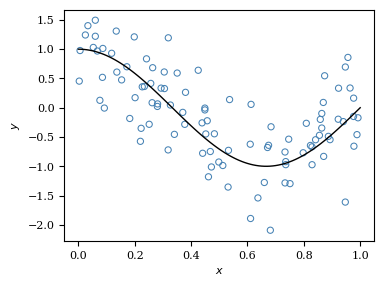

In [35]:
import matplotlib.pyplot as plt

# Sample scatter plot
plt.scatter(x, y, s=20, color='none', edgecolor='steelblue', 
    lw=0.75, label='Sample')

# Plot true relationship
xvalues = np.linspace(0.0, 1.0, 101)
plt.plot(xvalues, compute_true_y(xvalues), color='black', lw=1.0, 
    label='True function')

plt.xlabel('$x$')
plt.ylabel('$y$')

#### Estimating the Ridge and linear regression models

We now estimate a polynomial approximation where we assume that $y$ is a 
degree-$K$ polynomial in $x$, i.e.,
$$
y_i \approx \mu + \beta_1 x_i + \beta_2 x_i^2 + \cdots + \beta_K x_i^K 
$$
For this example, we choose an unconventionally high $K=15$ since we anticipate that this leads to problems with OLS.

A few more steps are required before we can run the Ridge regression:

- We need to create the polynomial in $x$ which we do with the
[`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) transformation we already encountered.
- Moreover, regularisation methods can be susceptible to scaling issues, so we need to demean and normalise all input variables, i.e., we make sure that each feature has mean $0$ and a variance of $1$. We can automate this step using the
[`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
transformation.
- Finally, the estimation step is performed by the [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) class.
- We build a 
[`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
that combines these transformation together with the estimation step. 
We use the function
[`make_pipeline()`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) to simplify this step.

To run the Ridge regression, we moreover need to specify the regularisation strength $\alpha$
which we set to $\alpha = 3$ for illustration.

In [36]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

# Polynomial degree
degree = 15

# Build pipeline of transformations and Ridge estimation.
# We create the polynomial transformation w/o the intercept so we 
# need to include an intercept in the fitting step.
pipe_ridge = make_pipeline(
    PolynomialFeatures(
        degree=degree, 
        include_bias=False
    ),
    StandardScaler(),                           # standardise features
    Ridge(alpha=3.0, fit_intercept=True)        # Fit Ridge regression
)

# Make sure X is a matrix
X = x[:, None]

# Fit model
pipe_ridge.fit(X, y)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=15, include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=3.0))])

It is instructive to estimate the same model using linear regression and compare the results:

In [37]:
from sklearn.linear_model import LinearRegression

# Create pipeline for linear model (linear regression does not require
# standardisation!)
pipe_lr = make_pipeline(
    PolynomialFeatures(
        degree=degree, 
        include_bias=False
    ),
    LinearRegression(fit_intercept=True)
)

# Make sure X is a matrix
X = x[:, None]

# Fit model
pipe_lr.fit(X, y)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=15, include_bias=False)),
                ('linearregression', LinearRegression())])

To illustrate the difference for this artificial example, we add the model predictions from the Ridge and linear regressions to the sample scatter plot we created earlier.

Text(0, 0.5, '$y$, $\\widehat{y}$')

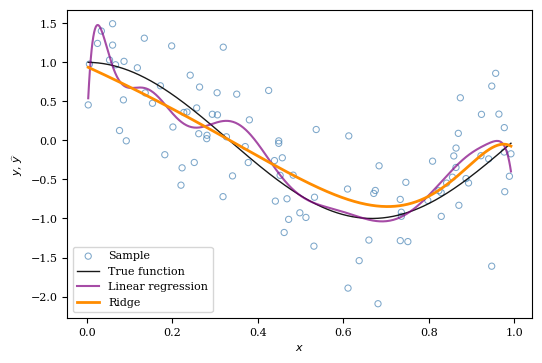

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Grid on which to evaluate true model and predictions
xvalues = np.linspace(np.amin(x), np.amax(x), 500)

# Sample points scatter plot
ax.scatter(x, y, s=20, color='none', edgecolor='steelblue', 
    lw=0.75, alpha=0.7, label='Sample')

# True model
ax.plot(xvalues, compute_true_y(xvalues), color='black', lw=1.0, alpha=0.9, 
    label='True function')

# LR prediction
ax.plot(xvalues, pipe_lr.predict(xvalues[:, None]), color='purple', 
    alpha=0.7, label='Linear regression')

# Ridge prediction
ax.plot(xvalues, pipe_ridge.predict(xvalues[:, None]), 
    color='darkorange', lw=2.0, 
    label='Ridge'
)
ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$, $\widehat{y}$')

As the graph shows, the OLS model vastly overfits the data which is what we would expect in this settings. Conversely, the prediction of the Ridge regression is reasonably close to the true function and much better behaved despite the high polynomial degree used here.

To gain some intuition for what is going on, it is instructive to plot the estimated Ridge coefficients for a whole range of $\alpha$ values which we do in the code below. 
Note that we choose the grid of $\alpha$ to be uniformly spaced in logs since we want to zoom in on what happens when $\alpha$ is small. This is accomplished by using 
[`np.logspace()`](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html)
instead of `np.linspace()`.

In [39]:
# Create grid of alphas spaced uniformly in logs
alphas = np.logspace(start=np.log10(5.0e-3), stop=np.log10(1000.0), num=100)

# Re-create pipeline w/o Ridge estimator, estimation step differs for each alpha
transform = make_pipeline(
    PolynomialFeatures(
        degree=degree, 
        include_bias=False
    ),
    StandardScaler()
)

# Create polynomial features
Xtrans = transform.fit_transform(x[:, None])

# Array to store coefficients for all alphas
coefs = np.empty((len(alphas), Xtrans.shape[1]))

# Estimate Ridge for each alpha, store fitted coefficients
for i, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha, fit_intercept=True)
    
    # Fit model for given alpha
    ridge.fit(Xtrans, y)

    coefs[i] = ridge.coef_

The following plot shows each coefficient (one color corresponds to one coefficients) for different values of $\alpha$ on the $x$-axis. Note that the $x$-axis is plotted on a $\log_{10}$ scale which allows us to zoom in on smaller values of $\alpha$.

Text(0, 0.5, 'Coefficient value')

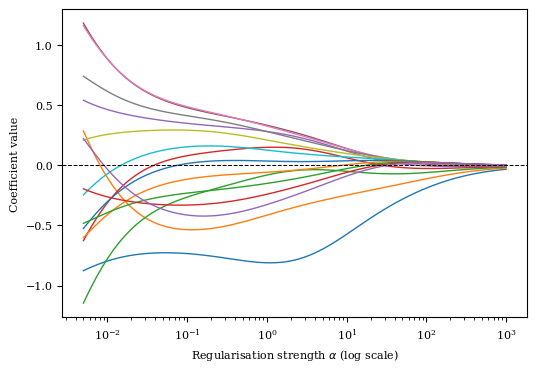

In [40]:
plt.figure(figsize=(6,4))
plt.plot(alphas, coefs, lw=1.0)
plt.xscale('log', base=10)
plt.axhline(0.0, ls='--', lw=0.75, c='black')
plt.xlabel(r'Regularisation strength $\alpha$ (log scale)')
plt.ylabel('Coefficient value')

For small $\alpha$ (on the left) the estimated coefficients are close to the (standardised) OLS coefficients, but their values shrink towards zero as $\alpha$ increases. For a very large $\alpha = 10^3$ the estimated coefficients are basically zero since the penalty dominates the sum of squared errors in the loss function.

### Tuning the regularisation parameter via cross-validation

In the previous example, we picked an arbitrary regularisation strength $\alpha$ when fitting the Ridge regression. In applied work, we would want to tune $\alpha$ (which is a hyperparameter) using cross-validation instead. To this end, we could use the generic cross-validation functionality we studied earlier in this unit since that one works for all types of estimators. However, `scikit-learn` implements a cross-validation class specifically for Ridge regression called
[`RidgeCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)
which we use in the code below to find an optimal $\alpha$.

In [41]:
from sklearn.linear_model import RidgeCV

# RidgeCV does not support pipelines, so we need to transform x before
# cross-validation.
transform = make_pipeline(
    PolynomialFeatures(
        degree=degree, 
        include_bias=False
    ),
    StandardScaler()
)

# Create standardised polynomial features
Xtrans = transform.fit_transform(x[:, None])

# Set of candidate alphas on [1.0e-5, 5] to cross-validate. 
# Spaced uniformly in logs to get denser grid for small alphas.
alphas = np.logspace(start=np.log10(1.0e-5), stop=np.log10(5), num=100)

# Create and run Ridge cross-validation
rcv = RidgeCV(alphas=alphas, store_cv_values=True).fit(Xtrans, y)


By default, RidgeCV uses the (negative) mean squared error (MSE) to find the best $\alpha$ which we can then recover from the `alpha_` attribute. 

In [42]:
# Recover best alpha that minimizes MSE
alpha_best = rcv.alpha_

# Best MSE is stored as negative score!
MSE_best = - rcv.best_score_

print(f'Best alpha: {alpha_best:.3g} (MSE: {MSE_best:.3g})')

Best alpha: 0.6 (MSE: 0.267)


Because we fitted `RidgeCV` with the argument `store_cv_values=True`, the fitted object stores the MSE for each CV split in the attribute `cv_values_` which we can use to plot the MSE as a function of $\alpha$.

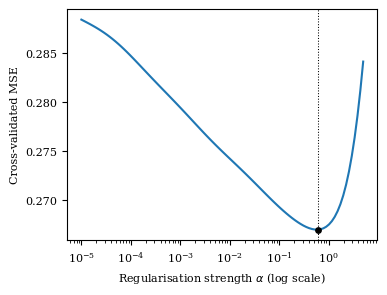

In [43]:
import matplotlib.pyplot as plt

# Compute average MSE for each alpha value across all folds
mse_mean = np.mean(rcv.cv_values_, axis=0)

# Index of MSE-minimising alpha
imin = np.argmin(mse_mean)

# Plot MSE against alphas, highlight minimum MSE
plt.plot(alphas, mse_mean)
plt.xlabel(r'Regularisation strength $\alpha$ (log scale)')
plt.ylabel('Cross-validated MSE')
plt.scatter(alphas[imin], mse_mean[imin], s=15, c='black', zorder=100)
plt.axvline(alphas[imin], ls=':', lw=0.75, c='black')
plt.xscale('log')

Now that we have identified the optimal $\alpha$, we can re-fit the Ridge regression and plot the prediction from this model. Note that this is not strictly necessary as the return value of `RidgeCV` can be used to do prediction based on coefficients estimated for the best $\alpha$, but because `RidgeCV` does not support pipelines, we'd have to apply any transformations manually before doing so.

In [44]:
# Create pipeline with Ridge estimator using optimal alpha
pipe_ridge = make_pipeline(
    PolynomialFeatures(
        degree=degree, 
        include_bias=False
    ),
    StandardScaler(),
    Ridge(alpha=alpha_best, fit_intercept=True)
)

# Fit Ridge regression with optimal alpha
pipe_ridge.fit(x[:, None], y)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=15, include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.599686603363296))])

Text(0, 0.5, '$y$')

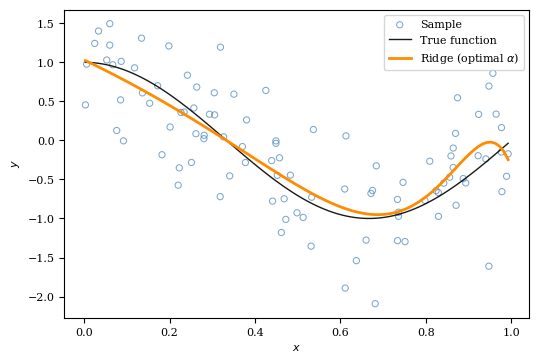

In [45]:
# Plot sample scatter, true model and Ridge prediction using optimal alpha
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Sample scatter plot
ax.scatter(x, y, s=20, color='none', edgecolor='steelblue', 
    lw=0.75, alpha=0.7, label='Sample')

xvalues = np.linspace(np.amin(x), np.amax(x), 100)
# Plot true relationship
ax.plot(xvalues, compute_true_y(xvalues), color='black', lw=1.0, alpha=0.9, 
    label='True function')

# Plot model prediction
ax.plot(xvalues, pipe_ridge.predict(xvalues[:, None]), c='darkorange',
    lw=2.0, label=r'Ridge (optimal $\alpha$)')
    
ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

***
## Linear models with regularisation: Lasso

Another widely used estimator with shrinkage is LASSO (least absolute shrinkage and selection operator) which adds an L1 penalty term to the objective function:
$$
L(\mu, \mathbf{\beta}) = 
    \underbrace{\sum_{i=1}^N \Bigl(
    y_i - \mu - \mathbf{x}_i'\mathbf{\beta}\Bigr)^2}_{\text{Sum of squared errors}}
    + 
    \underbrace{\alpha \sum_{k=1}^K |\beta_k|}_{\text{L1 penalty}}
$$
As with the Ridge regression, this additional term penalises large coefficient values.
This term is called an L1 penalty because it corresponds to the L1 vector norm which can equivalently be written as $\alpha \|\mathbf{\beta}\|_1$.

While the objective looks very similar to Ridge regression, using the L1 instead of the L2 norm can produce much more parsimonious models because many coefficients end up being exactly zero and the corresponding features are thus eliminated from the model. We will see this in the example below.

### Example: Polynomial approximation

We apply Lasso to the same random sample as in the section on Ridge which allows us to compare the two methods. The following code recreates that data, making the same functional form and distributional assumptions as in the previous section.

In [46]:
import numpy as np

# True function (w/o errors)
def compute_true_y(x):
    return np.cos(1.5 * np.pi * x)

In [47]:
from numpy.random import default_rng

# Initialise random number generator
rng = default_rng(1234)

# Sample size
N = 100

# Randomly draw explanatory variable x uniformly distributed on [0, 1]
x = rng.random(size=N)

# Draw errors from normal distribution
epsilon = rng.normal(scale=0.5, size=N)

# Compute y, add measurement error
y = compute_true_y(x) + epsilon

#### Estimating the Lasso and linear regression models

As with Ridge, we need to standardise the explanatory variables before fitting Lasso. The code below repeats these steps, but we now use 
[`Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
to perform the model estimation. For now, we set the regularisation strength to $\alpha = 0.015$ and will use cross-validation to find the optimal value later.

Note that for Lasso it might be necessary to increase the number of iterations by increasing the `max_iter` parameter (from the default of 1,000).

In [48]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

# Polynomial degree
degree = 15

# Build pipeline of transformations and Lasso estimation.
# We create the polynomial transformation w/o the intercept so we 
# need to include an intercept in the fitting step.
pipe_lasso = make_pipeline(
    PolynomialFeatures(
        degree=degree, 
        include_bias=False
    ),
    StandardScaler(),
    Lasso(alpha=0.015, fit_intercept=True, max_iter=10000)
)

# Make sure X is a matrix
X = x[:, None]

pipe_lasso.fit(X, y)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=15, include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.015, max_iter=10000))])

For completeness, let's also recreate the linear regression estimation and plot the model predictions alongside the Lasso.

In [49]:
from sklearn.linear_model import LinearRegression

# Create pipeline for linear model (linear regression does not require
# standardisation!)
pipe_lr = make_pipeline(
    PolynomialFeatures(
        degree=degree, 
        include_bias=False
    ),
    LinearRegression(fit_intercept=True)
)

# Make sure X is a matrix
X = x[:, None]

pipe_lr.fit(X, y)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=15, include_bias=False)),
                ('linearregression', LinearRegression())])

The following code plots the sample data, the true functional relationship, and the predictions from the linear regression and Lasso models.

Text(0, 0.5, '$y$, $\\widehat{y}$')

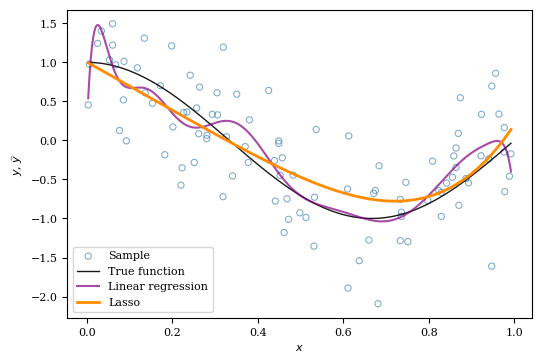

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Sample points scatter plot
ax.scatter(x, y, s=20, color='none', edgecolor='steelblue', 
    lw=0.75, alpha=0.7, label='Sample')

# Grid on which to evaluate true model and predictions
xvalues = np.linspace(np.amin(x), np.amax(x), 500)

# True model
ax.plot(xvalues, compute_true_y(xvalues), 
    color='black', lw=1.0, alpha=0.9, 
    label='True function'
)

# Linear regression prediction
ax.plot(xvalues, pipe_lr.predict(xvalues[:, None]), 
    color='purple', alpha=0.7, 
    label='Linear regression'
)

# Lasso prediction
ax.plot(xvalues, pipe_lasso.predict(xvalues[:, None]), 
    color='darkorange', lw=2.0, 
    label='Lasso'
)

ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$, $\widehat{y}$')

You might be wondering why we chose $\alpha = 0.015$ whereas we initially used $\alpha = 3$ for the Ridge regression. The reason is that the `scikit-learn` implementation of Lasso uses a slightly different loss function than the one given above, namely
$$
L(\mu, \mathbf{\beta}) =  \frac{1}{2N}\sum_{i=1}^N \Bigl(
    y_i - \mu - \mathbf{x}_i'\mathbf{\beta}\Bigr)^2
    + 
    \alpha \|\beta_k\|_1
$$
which scales the sum of squared errors term by a factor of of $(2N)^{-1}$. This makes no difference for the optimisation, but changes the interpretation of the regularisation strength $\alpha$ compared to Ridge regression. For our sample size of $N=100$, an $\alpha_{Ridge}$ used for the `Ridge` estimator approximately corresponds to 
$\alpha_{Lasso} = \frac{\alpha}{200}$ when plugged into `Lasso`.

We next fit the model for different values of $\alpha$ on the interval $[5 \times 10^{-3}, 1]$ where we again space the $\alpha$ uniformly in logs.

In [51]:
# Create grid of alphas spaced uniformly in logs
alphas = np.logspace(start=np.log10(5.0e-3), stop=np.log10(1.0), num=100)

# Re-create pipeline w/o Lasso estimator, estimation step differs for each alpha
transform = make_pipeline(
    PolynomialFeatures(
        degree=degree, 
        include_bias=False
    ),
    StandardScaler()
)

# Create polynomial features
Xtrans = transform.fit_transform(x[:, None])

# Array to store coefficients for all alphas
coefs = np.empty((len(alphas), Xtrans.shape[1]))

# Estimate Lasso for each alpha, store fitted coefficients
for i, alpha in enumerate(alphas):
    lasso = Lasso(alpha=alpha, 
        fit_intercept=True, 
        max_iter=10000
    )
    
    # Fit model for given alpha
    lasso.fit(Xtrans, y)

    coefs[i] = lasso.coef_

Plotting the fitted coefficients against $\alpha$ on a log scale looks as follows:

Text(0, 0.5, 'Coefficient value')

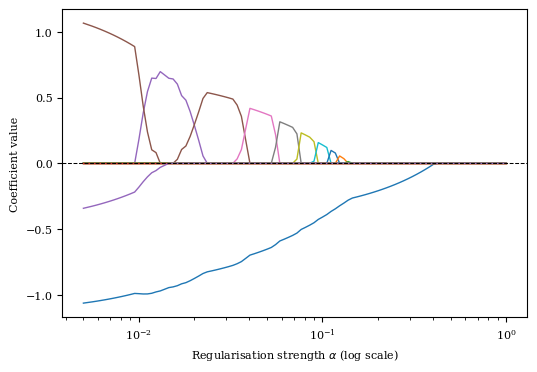

In [52]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, coefs, lw=1.0)
plt.xscale('log', base=10)
plt.axhline(0.0, ls='--', lw=0.75, c='black')
plt.xlabel(r'Regularisation strength $\alpha$ (log scale)')
plt.ylabel('Coefficient value')

The graph shows that the coefficient estimates are quite different than what we obtained from the Ridge estimator. In fact, most of them are exactly zero for most values of $\alpha$. We highlight this result in the graph below which plots the number of non-zero coefficients against $\alpha$.

Text(0, 0.5, 'Number of non-zero coefficients')

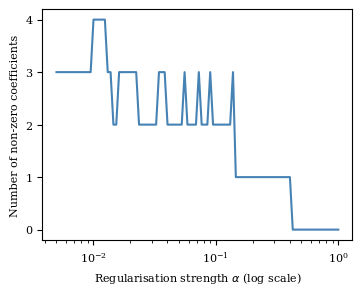

In [53]:
# Number of non-zero coefficients for each alpha. 
nonzero = np.sum(np.abs(coefs) > 1.0e-6, axis=1).astype(int)

plt.plot(alphas, nonzero, lw=1.5, c='steelblue')
plt.xscale('log', base=10)
plt.yticks(np.arange(0, np.amax(nonzero) + 1))
plt.xlabel(r'Regularisation strength $\alpha$ (log scale)')
plt.ylabel('Number of non-zero coefficients')

Clearly, in this case the model estimated by Lasso is substantially less complex than the linear regression or even Ridge regression. For most values of $\alpha$, only 2-3 features out of the original 15 are retained in the model!

### Tuning the regularisation parameter via cross-validation

In the previous example, we picked an arbitrary regularisation strength $\alpha$ when fitting the Lasso. In this section, we again find an optimal $\alpha$ using cross-validation. Just like in the case of Ridge regression, `scikit-learn` implements a cross-validation class specifically for Lasso called
[`LassoCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)
which we use in the code below to find an optimal $\alpha$.

`LassoCV` optionally accepts a grid of candidate $\alpha$ just like `RidgeCV`, but the default way to run cross-validation is to specify the fraction $\epsilon = \frac{\alpha_{min}}{\alpha_{max}}$ (default: $10^{-3}$) and the grid size (default: 100). `LassoCV` then automatically determines an appropriate grid which is stored in the `alphas_` attribute once fitting is complete. Moreover, we use the `cv=...` argument to set the desired number of CV folds (default: 5). 

In [54]:
from sklearn.linear_model import LassoCV

# LassoCV does not support pipelines, so we need to transform x before
# cross-validation.
transform = make_pipeline(
    PolynomialFeatures(
        degree=degree, 
        include_bias=False
    ),
    StandardScaler()
)

# Create standardised polynomial features
Xtrans = transform.fit_transform(x[:, None])

# Create and run Lasso cross-validation, use defaults for eps and n_alphas
lcv = LassoCV(max_iter=100000, cv=10).fit(Xtrans, y)

After fitting, we can recover the best alpha from the `alpha_` attribute and the MSE for each $\alpha$ on the grid and each CV fold from the `mse_path_` attribute.

In [55]:
# Recover best alpha that minimizes MSE
alpha_best = lcv.alpha_

# MSE for each alpha, averaged over folds
mse_mean = np.mean(lcv.mse_path_, axis=1)

# Index of min. MSE
imin = np.argmin(mse_mean)

mse_best = mse_mean[imin]

print(f'Best alpha: {alpha_best:.4g} (MSE: {mse_best:.3g})')

Best alpha: 0.001251 (MSE: 0.263)


The next plot visualises the average MSE over the entire range of candidate $\alpha$ values.

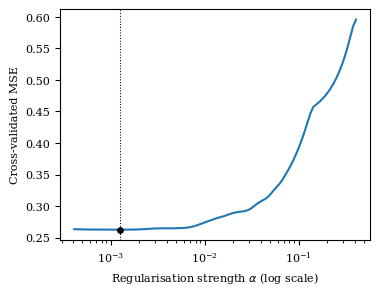

In [56]:
import matplotlib.pyplot as plt

# Recover grid of alphas used for CV
alphas = lcv.alphas_

# Plot MSE against alphas, highlight minimum MSE
plt.plot(alphas, mse_mean)
plt.xlabel(r'Regularisation strength $\alpha$ (log scale)')
plt.ylabel('Cross-validated MSE')
plt.scatter(alphas[imin], mse_mean[imin], s=15, c='black', zorder=100)
plt.axvline(alphas[imin], ls=':', lw=0.75, c='black')
plt.xscale('log')

Now that we have identified the optimal $\alpha$, we can re-fit the Lasso and plot the prediction from this model.

In [57]:
# Create pipeline with Lasso using optimal alpha
pipe_lasso = make_pipeline(
    PolynomialFeatures(
        degree=degree, 
        include_bias=False
    ),
    StandardScaler(),
    Lasso(alpha=alpha_best, fit_intercept=True, max_iter=100000)
)

pipe_lasso.fit(x[:, None], y)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=15, include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.001250626984419745, max_iter=100000))])

Finally, we visually compare the true model to the Lasso prediction using the optimal value of $\alpha$.

Text(0, 0.5, '$y$')

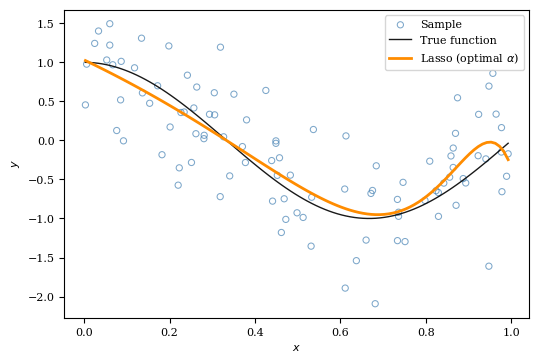

In [58]:
# Plot sample scatter, true model and Lasso prediction using optimal alpha
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.scatter(x, y, s=20, color='none', edgecolor='steelblue', 
    lw=0.75, alpha=0.7, label='Sample')

# Grid on which to evaluate true model and predictions
xvalues = np.linspace(np.amin(x), np.amax(x), 100)

# Plot true relationship
ax.plot(xvalues, compute_true_y(xvalues), color='black', lw=1.0, alpha=0.9, 
    label='True function')

# Plot prediction from optimal Lasso model
ax.plot(xvalues, pipe_ridge.predict(xvalues[:, None]), c='darkorange',
    lw=2.0, label=r'Lasso (optimal $\alpha$)')
    
ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

***
## Dealing with categorical data (optional)

So far in this unit, we only dealt with continuous data, i.e., data that can take on (almost any) real value. However, many data sets contain categorical variables which take on a finite number of admissible values or even binary variables (often called dummy or indicator variables) which can be either 0 or 1. Dealing with such data in `scikit-learn` is less straightforward than in most other software packages, so in this section we illustrate how to work with categorical variables.

To do this, we again load the Ames house data which contains several categorical and binary variables.

In [59]:
import pandas as pd

df = pd.read_csv(f'{DATA_PATH}/ames_houses.csv')

For example, consider the `BuildingType` variable, which (in this simplified version of the data) takes on three values, 'Single-family', 'Townhouse' and 'Two-family' and has on top a few missing observations. We use the 
[`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html) method to tabulate the number of observations falling into each category. The argument `dropna=False` also includes the number of missing values in the tabulation.

In [60]:
df['BuildingType'].value_counts(dropna=False).sort_index()

Single-family    1220
Townhouse         114
Two-family         52
NaN                74
Name: BuildingType, dtype: int64

There are several ways to deal with such data (see the official
[documentation](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) for details). 
First, since the data are stored as strings, we could use 
[`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)
to map these strings to integers.

In [61]:
from sklearn.preprocessing import OrdinalEncoder

# Drop rows with NA
df = df.dropna(subset='BuildingType')

enc = OrdinalEncoder()

# Transform string variable into integers
bldg_int = enc.fit_transform(df[['BuildingType']].to_numpy())

# Print unique values and histogram
print(f'Unique values: {np.unique(bldg_int)}')
print(f'Histogram: {np.bincount(bldg_int.astype(int).flatten())}')


Unique values: [0. 1. 2.]
Histogram: [1220  114   52]


This, however, is still not particularly useful if we want to use these categories as explanatory variables in a `LinearRegression` because `scikit-learn` will simply treat them as a continuous variable that happens to take on the values 0, 1 or 2. There is nothing to enforce the categorical nature of this data.

An alternative encoding strategy is to create a binary dummy variable for each possible value of a categorical variable. This is achieved using the 
[OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) 
transformation as illustrated by the following code:

In [62]:
from sklearn.preprocessing import OneHotEncoder

# Drop rows with NA
df = df.dropna(subset='BuildingType')

# List of unique categories
bldg_uniq = list(np.sort(df['BuildingType'].unique()))

# Create dummy variable encoder
enc = OneHotEncoder(categories=[bldg_uniq], sparse_output=False)

# Convert string variable into binary indicator variables
bldg_dummies = enc.fit_transform(df[['BuildingType']].to_numpy())

When creating a `OneHotEncoder`, we can optionally pass the list of possible values using the `categories=...` argument. By default, this transformation returns a sparse matrix since each row will have exactly one element that is 1 while the remaining elements are 0. Using a sparse matrix saves memory but makes interacting with the resulting array more cumbersome. For small data sets, there is no need to use sparse matrices.

The transformed data now looks as follows:

In [63]:
# Print first 5 rows
bldg_dummies[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In this particular example, the first five observations fall into the first category, hence the first column contains ones while the remaining elements are zero.

We can sum the number of ones in each column to verify that the frequency of each category remains the same:

In [64]:
bldg_dummies.sum(axis=0)

array([1220.,  114.,   52.])

The category labels taken from the original data are stored in the `categories_` attribute:

In [65]:
enc.categories_[0]

array(['Single-family', 'Townhouse', 'Two-family'], dtype=object)

Now that we have converted the categories into a dummy matrix, we can append it to the continuous explanatory variables and fit the linear model as usual:

In [66]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Name of dependent variable
target = 'SalePrice'
# Continuous explanatory variables to include
continuous = ['LivingArea', 'LotArea']

y = df[target].to_numpy()
# Feature matrix with dummies appended
X = np.hstack((df[continuous].to_numpy(), bldg_dummies))

# Create and fit linear model
lr = LinearRegression(fit_intercept=False)
lr.fit(X, y)

# Create DataFrame containing estimated coefficients
labels = continuous + [f'BuildingType: {s}' for s in enc.categories_[0]]

coefs = pd.DataFrame(lr.coef_, index=labels, columns=['Coef'])
coefs

,Coef
LivingArea,1152.605777
LotArea,8.385689
BuildingType: Single-family,12173.902329
BuildingType: Townhouse,37735.490189
BuildingType: Two-family,-41842.492374


Finally, you should be aware that `pandas` provides the function
[`get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) which accomplishes something very similar to `OneHotEnconder` but may not work as well with the `scikit-learn` API.

In [67]:
pd.get_dummies(df['BuildingType']).head(5)

,Single-family,Townhouse,Two-family
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


***
## Optional exercises

### Exercise 1: Interactions of explanatory variables

In applied work, we frequently encounter interactions of variables, i.e., an explanatory variable is formed as the product of two other variables. For example, if our data contains the variables $x$ and $z$, we might add $x \cdot z$ as an independent variable to the model.

To illustrate, consider the following linear model which contains the interaction terms $d \cdot x$, $d \cdot z$ and $x \cdot z$:
$$
y_i = \alpha + \beta_1 d_i + \beta_2 x_i + \beta_3 z_i + \beta_4 d_i x_i + \beta_5 d_i z_i + \beta_6 x_i z_i  + \epsilon_i
$$
where $y$ is a function of $(d,x,z)$ but is only observed with an additive error term $\epsilon_i$.
Assume that these variables are mutually independent and distributed as follows:

- $d_i$ is a dummy variable that is $1$ with a probability of 60% and zero otherwise;
- $x_i$ is uniformly distributed on the interval $[0, 1]$;
- $z_i$ is normally distributed with mean $1$ and variance $4$; and
- The error term $\epsilon_i$ is normally distributed with mean $0$ and variance $0.3^2$.

Create an artificial data set of size $N = 200$ and compute $y$ assuming for the following model parameters:

In [68]:
# Intercept
alpha = 0.1

# array containing beta_1, beta_2, ..., beta_6
betas = np.array([0.5, 1.5, 2.0, -0.5, -0.75, -0.1])

Perform the following tasks:

1. Split the sample into a training data set that comprises the first 150 observations and use the remainder as the test sample.
2. Create the matrix of features $\mathbf{X} = [d, x, z, d\cdot x, d\cdot z, x\cdot z]$. Use the 
    [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
    pre-processor to create the last three interaction terms.

    *Hint:* You can use `PolynomialFeatures(degree=(2, 2), interaction_only=True)` which creates interaction terms where the sum
    of exponents sums to 2.
3. Fit the model as a 
    [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Compute the predicted values on the test sample and plot the prediction error against the test sample values of $y$.
4. Create a figure with two panels and plot the model predictions for $d=0$ and the left and $d=1$ on the right.
    Each panel should display the predictions for a grid of 101 values for $x$ uniformly spaced on $[0, 1]$ on the $x$-axis. Plot
    three different lines, one for $z$ evaluated at the 25th, 50th and 75th percentile of the sample distribution.
    Contrast the predictions with the true values of $y$.

### Exercise 2: Polynomial under- and overfitting

Consider the following non-linear model,
$$
y_i = \cos\left(\frac{3}{2} \pi x_i \right) + \epsilon_i
$$
where $y_i$ is a trigonometric function of $x_i$ but is measured with an additive error $\epsilon_i$. In this exercise, we are going to approximate $y_i$ using polynomials in $x_i$ of varying degrees:

1. Create a sample of size $N=50$ where the $x_i$ are randomly drawn from a uniform distribution on the interval $[0, 1]$ and 
    $\epsilon_i \stackrel{\text{iid}}{\sim} N(0, 0.2^2)$. Then generate $y_i$ according to the equation given above.
2. Create a scatter plot of the sample $(x_i, y_i)$ and add a line depicting the true non-linear relationship (without measurement error).
3. Use the 
    [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
    transformation and 
    [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
    to approximate $y$ as a polynomial in $x$. Fit this model using the polynomial degrees
    $d \in \{0, 1, 2, 3, 6, 10\}$.
4. Create a figure with 6 panels, one for each polynomial degree. 
    Each panel should show the sample scatter plot, the true function $y = f(x)$ and the polynomial approximation of a given 
    degree.
5.  How does the quality of the approximation change as you increase $d$? Do higher-order polynomials always perform better?

*Hint:* When creating polynomials with `PolynomialFeatures(..., include_bias=True)`, you need to fit the model without
an additional intercept as the intercept is already included in the polynomial.

*Hint:* The cosine function and the constant $\pi$ are implemented as `np.cos()` and `np.pi` in NumPy.
    



### Exercise 3: Polynomial fitting with scikit-learn pipelines

In this exercise, we explore how to simplify fitting models to polynomials using a feature of `scikit-learn` called pipelines. These allow us to fuse several transformations and an estimation step into a single model.

Continuing with the setup from the previous exercise, we now focus on the model with polynomial degree $d=5$.
Use either 
[`make_pipeline()`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)
or the 
[`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
class to create a model that combines the 
[`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
transformation and the fitting of a linear model in a single step.

Fit the model using this pipeline.
Plot the sample, the true relationship and the predicted value for $d=5$ on a grid of 101 $x$-values that are uniformly spaced on $[0, 1]$.

### Exercise 4: Optimal polynomial degree with cross-validation

In the previous exercises, we fitted polynomials of varying degrees but did not make any systematic attempt to assess the model fit and choose the preferred polynomial degree (which in this setting is a so-called *hyperparameter*).
In this exercise, we explore how cross-validation can be used to tune a hyperparameter in a systematic way. 

Consider the following model where $y$ is a non-linear trigonometric function of $x$ and includes an additive error term $\epsilon$,
$$
y_i = \sin\bigl(2 \pi (x_i + 0.1) \bigr) + \epsilon_i
$$
and $x$ and $\epsilon$ are assumed to be independent.

Proceed as follows:

1. Create a sample of $N=100$ observations. Draw the $x_i$ from the standard uniform distribution on $[0, 1]$ and 
    let $\epsilon \stackrel{\text{iid}}{\sim} N(0, 0.25)$. Compute $y_i$ according to the equation above.

    *Hint:* The sine function and the constant $\pi$ are implemented as `np.sin()` and `np.pi` in NumPy.
    
2. Create a sample scatter plot of $(x_i, y_i)$ and add a line showing the true relationship between $x$ and $y$ (without measurement error).
3. Program a function `compute_splits_mse(d, x, y, n_splits)` which takes as arguments the polynomial degree $d$, the 
    sample observations $(x, y)$ and the number of splits `n_splits` and returns the mean squared error (MSE) for the
    test sample for each of the splits. Thus the function should return an array of `n_split` MSEs.

    For this exercise, ignore the three-way split into training/validation/test samples illustrated in the lecture and
    only focus on the training/test samples within each split.

    *Hint:* You do not need to assign training/test samples manually. Use the 
    [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) class and call
    its `split()` method to do the work for you!

    *Hint:* To compute the MSE for each test sample, you can use 
    [`mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).
4. Using the function you just wrote, compute the MSEs for polynomial degrees $d = 0,\dots,15$ using `n_split=10` splits.
    For each $d$, compute the average MSE (averaging over 10 splits) and its standard deviation, and use these to create
    a plot of average MSE on the $y$-axis against $d$ on the $x$-axis.
5. Which degree $d$ results in the lowest average MSE? Explain the intuition behind your findings.
6. Add the fitted line using the optimal $d$ into the scatter plot you created earlier to visualise your results.



### Exercise 5: Automating cross-validation with scikit-learn

In the previous exercise, we performed fitting and cross-validation mostly manually. This exercise explores how most of these steps can be automated using the `scikit-learn` API.

Using the same setup (functional form for $y$, sample size and distributional assumptions for $x$ and $\epsilon$) as in the previous exercise, perform the following tasks:

1. For each polynomial degree $d = 0,\dots,15$, define a 
    [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
    that transforms $x$ into a polynomial and fits a linear model.

    *Hint:* To do this, you can either create an instance of `Pipeline` or use the convenience function
    [`make_pipeline()`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html).
2. For each $d$, perform the sample split and computation of MSEs using the function 
    [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html),
    which takes as arguments the pipeline you just created, the sample, the metric used to compute the store
    (`scoring=...`) and the number of folds (`cv=10`).

    *Hint:* To compute the MSE, you need to specify `scoring='neg_mean_squared_error'`. Note that this returns the
    *negative* MSE, so you need to correct for this manually.
3. Perform the remaining tasks as in the previous exercise, i.e., compute the mean MSE for each $d$, find the $d$ that
    gives the lowest average MSE and plot the average MSE against $d$.



### Exercise 6: Optimising hyperparameters with validation curves

This exercise asks you implemented an even faster way to find the optimal polynomial degree $d$ discussed in the previous exercises.

Using the same setup (functional form for $y$, sample size and distributional assumptions for $x$ and $\epsilon$) as in the previous exercise, perform the following tasks:

1. As before, create a [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
    that performs the polynomial transformation and the fitting of the linear model. You can use any value for 
    `PolynomialFeatures(degree=...)`.
2. Use the convenience function 
    [`validation_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html)
    to compute the MSE for *each* $d = 0,\dots,15$ and all cross-validation splits in a single call.

    To do this, the argument `param_name` specifies which parameter needs to be varied, and `param_range` determines
    the set of parameter values that are evaluated.

    Since our estimator is a pipeline, the parameter name needs to be specified as `'STEP__ARGUMENT'` where `STEP` is
    the name of the step in the pipeline we defined (see 
    [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
    for details), and `ARGUMENT` determines the argument name to be varied when re-creating the pipeline,
    which in our case is `degree`.

    *Hint:* For pipelines created using 
    [`make_pipeline()`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html),
    the name of each step in the pipeline is the class name converted to lower case, i.e., for 
    `PolynomialFeatures` the step name is `polynomialfeatures`.
3. Perform the remaining tasks as in the previous exercise, i.e., compute the mean MSE for each $d$, find the $d$ that
    gives the lowest average MSE and plot the average MSE against $d$.

The `scikit-learn` 
[documentation](https://scikit-learn.org/stable/modules/learning_curve.html) 
provides additional information on validation curves which you might want to consult.


***
## Solutions

### Exercise 1: Interactions of explanatory variables

#### Creating the data set

In [69]:
import numpy as np
import pandas as pd
from numpy.random import default_rng

rng = default_rng(1234)

N = 200

# Intercept
alpha = 0.1

# array containing beta_1, beta_2, ..., beta_6
betas = np.array([0.5, 1.5, 2.0, -0.5, -0.75, -0.1])

d = rng.binomial(n=1, p=0.6, size=N)
x = rng.uniform(0.0, 1.0, size=N)
z = rng.normal(loc=1.0, scale=2.0, size=N)
error = rng.normal(loc=0.0, scale=0.3, size=N)

def compute_y(d, x, z):
    return alpha + betas[0]*d + betas[1]*x + betas[2]*z + betas[3]*d*x \
        + betas[4]*d*z + betas[5]*x*z

y = compute_y(d, x, z) + error

The easiest way to visualise the data set is to convert it to a `DataFrame` and print the first few rows.

In [70]:
df = pd.DataFrame({'y': y, 'd': d, 'x': x, 'z': z})
df.head(5)

,y,d,x,z
0,2.611021,0,0.747273,1.030816
1,2.820446,1,0.002071,1.695387
2,5.234120,0,0.809356,2.074067
3,2.525688,1,0.806809,0.901620
4,-0.065962,1,0.054533,-0.594632


#### Creating interactions

The `PolynomialFeatures` transformer creates multivariate polynomials from a feature matrix $\mathbf{X}$ of a given degree. For example, if we have two variables $x$ and $z$ and set `degree=2`, it would return a matrix with the columns
$[x, x^2, z, z^2, x \cdot z]$. The quadratic terms are not part of our model, so we pass `interactions_only=True` to keep only the interaction terms.

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

X = df[['d', 'x', 'z']].to_numpy()

# Number of obs. in training dataset
N_train = 150

# Split into training / test data
X_train, X_test = X[:N_train], X[N_train:]
y_train, y_test = y[:N_train], y[N_train:]

poly = PolynomialFeatures(degree=(2, 2), include_bias=False, interaction_only=True)
X_train_interactions = poly.fit_transform(X_train)

It is convenient to use a `DataFrame` to print a few observations of the interaction terms that were created.

In [72]:
pd.DataFrame(X_train_interactions, columns=['d*x', 'd*z', 'x*z']).head(5)

,d*x,d*z,x*z
0,0.000000,0.000000,0.770301
1,0.002071,1.695387,0.003511
2,0.000000,0.000000,1.678660
3,0.806809,0.901620,0.727435
4,0.054533,-0.594632,-0.032427


The complete feature matrix $\mathbf{X}$ of course contains both the original non-interacted variables as well as the interactions, so we stack the two matrices horizontally.

In [73]:
X_train_all = np.hstack((X_train, X_train_interactions))
X_test_all = np.hstack((X_test, poly.transform(X_test)))

#### Fitting a linear regression model

We fit the model in the usual way and use `predict()` to obtain the predicted values $\widehat{y}_i$ for the test data set.

In [74]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=False)
lr.fit(X_train_all, y_train)

# Predict response variable on test sample
y_test_hat = lr.predict(X_test_all)
error = y_test - y_test_hat

Text(0, 0.5, 'Prediction error')

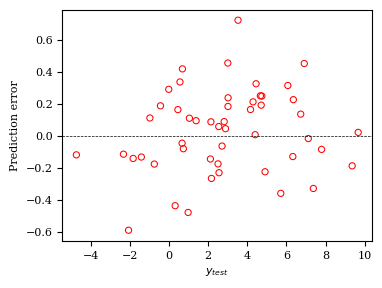

In [75]:
import matplotlib.pyplot as plt

# Plot prediction errors against response variable on test sample
plt.scatter(y_test, error, lw=0.75, color='none', edgecolor='red', s=20)
plt.axhline(0.0, lw=0.5, ls='--', c='black')
plt.xlabel('$y_{test}$')
plt.ylabel('Prediction error')

#### Alternative way to construct interactions

Using the preprocessing and pipeline features of `scikit-learn`, we can also construct the feature matrix in a more elegant way using a [`FeatureUnion`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html)
together with a [`FunctionTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html).

The `FunctionTransformer` is initialized using the identity function `lambda x: x` and hence just returns the argument.
The second component of the `FeatureUnion` is the `PolynomialFeatures` transformer which creates the interaction term in the same way as before.

In [76]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer

# Create complete feature matrix comprising both the original variables [d,x,z]
# as well as their interactions
transform_x = FeatureUnion([
    ('orig', FunctionTransformer(lambda x: x)),  
    ('interact', 
        PolynomialFeatures(
            degree=(2, 2), 
            include_bias=False, 
            interaction_only=True
        )
    )
])

# Verify that these are identical to the manually constructed feature matrix
x2 = transform_x.fit_transform(X_train)
np.all(x2 == X_train_all)

True

We can now combine this transformer with the `LinearRegression` into a pipeline to get an object which directly fits the linear model for $y$.

Text(0, 0.5, 'Prediction error')

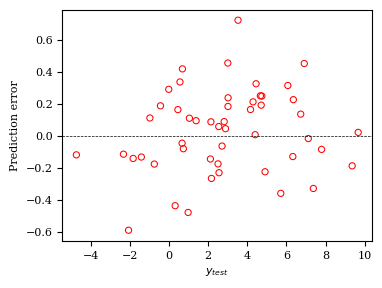

In [77]:
from sklearn.pipeline import make_pipeline

# Create pipeline from X transformer and linear regression model
model = make_pipeline(
    transform_x,
    LinearRegression(fit_intercept=False)
)

model.fit(X_train, y_train)

# Predict response variable on test sample
y_test_hat = model.predict(X_test)
error = y_test - y_test_hat

# Plot prediction errors against response variable on test sample
plt.scatter(y_test, error, lw=0.75, color='none', edgecolor='red', s=20)
plt.axhline(0.0, lw=0.5, ls='--', c='black')
plt.xlabel('$y_{test}$')
plt.ylabel('Prediction error')

#### Plotting predicted vs. true values

To compute the predicted values on a grid, we first need to create the 3-dimensional feature space. One easy way to do this is to create the 1-dimensional grids for each dimension and then form the Cartesian product using `pandas.merge(..., how='cross')` which creates the cross-product of two `DataFrame` objects.

In [78]:
dgrid = np.array([0, 1])
xgrid = np.linspace(0.0, 1.0, 101)
# Obtain grid for z as 25, 50, 75 percentiles of data
zgrid = np.percentile(z, q=[25.0, 50.0, 75.0])

df_pred = pd.DataFrame({'d': dgrid})
df_pred = df_pred.merge(pd.DataFrame({'x': xgrid}), how='cross')
df_pred = df_pred.merge(pd.DataFrame({'z': zgrid}), how='cross')

df_pred.head(6)

,d,x,z
0,0,0.00,-0.183693
1,0,0.00,0.980220
2,0,0.00,2.546668
3,0,0.01,-0.183693
4,0,0.01,0.980220
5,0,0.01,2.546668


We plot the predictions for $d=0$ on the left and the ones for $d=1$ on the right. Each plot contains three lines, one for each value of $z$. The model predictions are plotted using solid lines while the true values are dashed.

Text(0, 0.5, '$\\widehat{y}$')

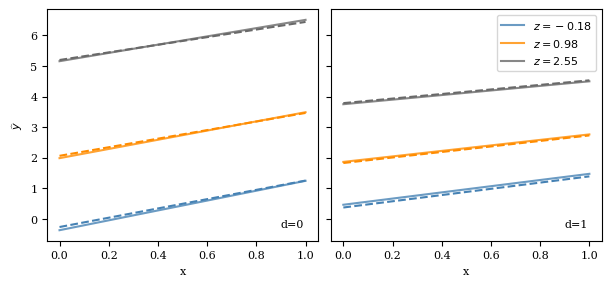

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(6, 2.75), sharex=True, sharey=True,
    constrained_layout=True)

colors = ['steelblue', 'darkorange', 'dimgrey']

for i, d in enumerate(dgrid):
    ax = axes[i]

    df_pred_d = df_pred[df_pred['d'] == d]
    X_pred = df_pred_d.to_numpy()
    y_pred = model.predict(X_pred)
    y_true = compute_y(d, df_pred_d['x'].to_numpy(), df_pred_d['z'].to_numpy())

    y_pred = y_pred.reshape((len(xgrid), len(zgrid)))
    y_true = y_true.reshape(y_pred.shape)

    for j, zj in enumerate(zgrid):
        ax.plot(xgrid, y_pred[:, j], c=colors[j], label=f'$z = {zj:.2f}$', alpha=0.8)
        ax.plot(xgrid, y_true[:, j], c=colors[j], ls='--')
    
    ax.set_xlabel('x')
    ax.text(0.95, 0.05, f'd={d}', transform=ax.transAxes, va='bottom', ha='right')

# Add legend to right panel
axes[1].legend()

# Add y-labels only to left panel
axes[0].set_ylabel(r'$\widehat{y}$')

### Exercise 2: Polynomial under- and overfitting

#### Creating and plotting the sample

We randomly draw values for $x_i$ and $\epsilon_i$ for each observation. We define a function `fcn(x)` which returns the true value for $y$ without measurement error.

In [80]:
import numpy as np

# True function (w/o errors)
def fcn(x):
    return np.cos(1.5 * np.pi * x)

In [81]:
from numpy.random import default_rng

# Initialise random number generator
rng = default_rng(123)

# Sample size
N = 50

# Randomly draw explanatory variable x
x = rng.random(size=N)
epsilon = rng.normal(scale=0.2, size=N)
y = fcn(x) + epsilon

Text(0, 0.5, '$y$')

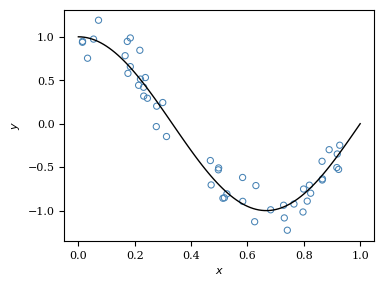

In [82]:
import matplotlib.pyplot as plt


xvalues = np.linspace(0.0, 1.0, 101)
plt.plot(xvalues, fcn(xvalues), color='black', lw=1.0, label='True function')

plt.scatter(x, y, s=20, color='none', edgecolor='steelblue', 
    lw=0.75, label='Sample')

plt.xlabel('$x$')
plt.ylabel('$y$')


#### Polynomial approximations

To plot the predicted values for each value of the polynomial degree $d$,
we create a 2-by-3 figure and iterate over the axes objects.
For each panel and corresponding $d$, we create a transformation as
`PolynomialFeatures(degree=d, include_bias=True)` and use it to create
a polynomial in $x$. 

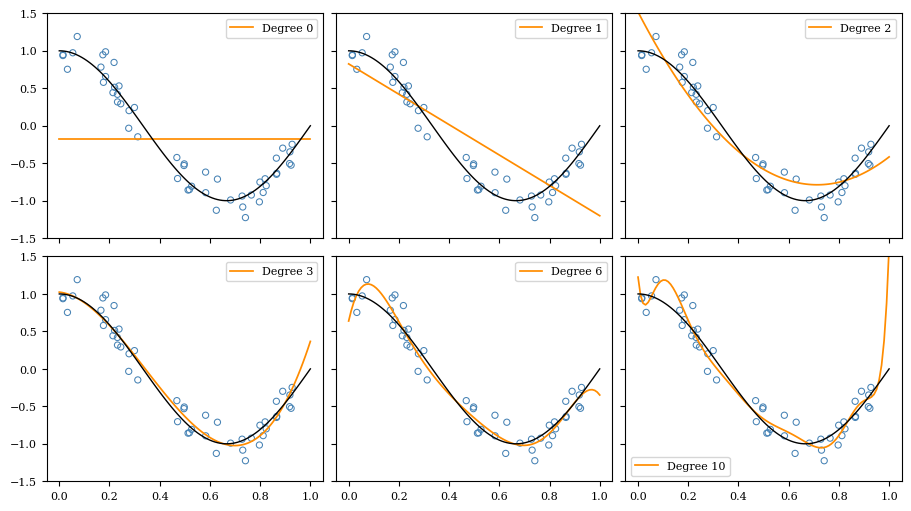

In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = np.array([0, 1, 2, 3, 6, 10])

ncol = 3
nrow = int(np.ceil(len(degrees) / ncol))

fig, axes = plt.subplots(nrow, ncol, figsize=(9, 5), 
    sharex=True, sharey=True,
    constrained_layout=True
)

axes = axes.flatten()

for i, ax in enumerate(axes):
    d = degrees[i]
    poly = PolynomialFeatures(degree=d, include_bias=True)
    poly.fit(x[:, None])
    Xpoly = poly.transform(x[:, None])
    
    lr = LinearRegression(fit_intercept=False)
    lr.fit(Xpoly, y)

    y_hat = lr.predict(poly.transform(xvalues[:, None]))
    ax.plot(xvalues, y_hat, lw=1.25, c='darkorange', label=f'Degree {d}')
    ax.plot(xvalues, fcn(xvalues), color='black', lw=1.0)
    ax.scatter(x, y, s=20, color='none', edgecolor='steelblue', lw=0.75)
    ax.set_ylim((-1.5, 1.5))
    ax.legend()

As the figure shows, a degree-0 polynomial is just a constant, while a polynomial of degree 1 is linear in $x$. Neither fits the true relationship very well ("underfitting"), but the fit initially improves as we increase $d$. For high $d$, on the other hand, the polynomial becomes too flexible and responds strongly to local "noise" introduced by measurement error ("overfitting").

### Exercise 3: Polynomial fitting with scikit-learn pipelines

We create the sample in the same way as in exercise 2.

In [84]:
import numpy as np

# True function (w/o errors)
def fcn(x):
    return np.cos(1.5 * np.pi * x)

In [85]:
from numpy.random import default_rng

# Initialise random number generator
rng = default_rng(123)

# Sample size
N = 100

# Randomly draw explanatory variable x
x = np.sort(rng.random(size=N))
epsilon = rng.normal(scale=0.2, size=N)
y = fcn(x) + epsilon

To transform $x$ and fit the linear model in a single step, we create a pipepline using `make_pipeline()` as follows:

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 5

# Create PipeLine object that consist of a polynomial transformation and
# a linear regression model
pipe_lr = make_pipeline(
    PolynomialFeatures(
        degree=degree, 
        include_bias=False
    ),
    LinearRegression(fit_intercept=True)
)

In Jupyter notebooks, printing the pipeline object produces a nice graphical representation that can be unfolded to see any parameters for each step of the pipeline (this will not be visible in the PDF version of this notebook).

In [87]:
# Show graphical representation of pipeline (only in Jupyter notebook)
pipe_lr

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('linearregression', LinearRegression())])

The input data can be transformed and the model fit in a single step by calling the `fit()` method of the pipeline object.

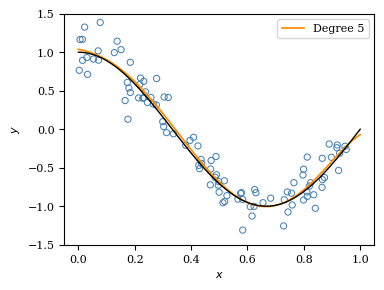

In [88]:
# Use pipeline to fit model
pipe_lr.fit(x[:, None], y)

# Compute predicted values on uniform grid
xvalues = np.linspace(0.0, 1.0, 101)
y_hat = pipe_lr.predict(xvalues[:, None])

# Plot predicted values
plt.plot(xvalues, y_hat, lw=1.25, c='darkorange', label=f'Degree {degree}')
# Plot true function
plt.plot(xvalues, fcn(xvalues), color='black', lw=1.0)
# Plot sample data
plt.scatter(x, y, s=20, color='none', edgecolor='steelblue', lw=0.75)
plt.ylim((-1.5, 1.5))
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.legend()

### Exercise 4: Optimal polynomial degree with cross-validation

#### Creating and plotting the sample

In [89]:
import numpy as np

# True function (w/o errors)
def fcn(x):
    return np.sin(2.0 * np.pi * (x + 0.1))

In [90]:
from numpy.random import default_rng

# Initialise random number generator
rng = default_rng(123)

# Sample size
N = 100

# Randomly draw explanatory variable x
x = rng.random(size=N)
epsilon = rng.normal(scale=0.5, size=N)
y = fcn(x) + epsilon

Text(0, 0.5, '$y$')

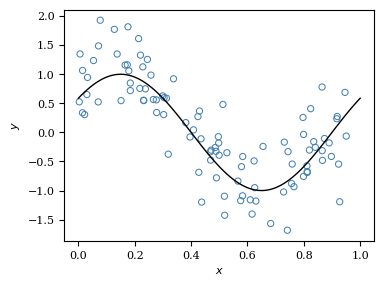

In [91]:
import matplotlib.pyplot as plt

xvalues = np.linspace(0.0, 1.0, 101)
plt.plot(xvalues, fcn(xvalues), color='black', lw=1.0, label='True function')

plt.scatter(x, y, s=20, color='none', edgecolor='steelblue', 
    lw=0.75, label='Sample'
)

plt.xlabel('$x$')
plt.ylabel('$y$')

#### Function to perform fitting and MSE computation

The following implementation uses two distinct functions:

1. `fit_poly()` takes a polynomial degree `d` and the sample data, creates
    the polynomial and fits a linear model.
2. `compute_splits_mse()` splits the sample into `n_splits` folds, fits
    the model on the training subset of each split and computes the 
    MSE on the test (or validation) sample.

In [92]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Function to perform polynomial transformation and model fitting.
# Alternatively, we could use a Pipeline (see next exercise)
def fit_poly(d, X, y):
    poly = PolynomialFeatures(degree=d, include_bias=True)
    poly.fit(X)
    Xpoly = poly.transform(X)
    lr = LinearRegression(fit_intercept=False)
    lr.fit(Xpoly, y)

    # Return poly transformer (required for prediction) and fitted model
    return poly, lr


In [93]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Function to compute MSE for given number of splits
def compute_splits_mse(d, x, y, n_splits=10):

    # Split sample into train/test blocks for k-fold validation
    kf = KFold(n_splits=n_splits)

    # list to store MSE for each CV split
    mse_splits = []

    # Manually iterate over folds (train/test combinations)
    for itrain, itest in kf.split(x):
        x_train = x[itrain]
        x_test = x[itest]

        y_train = y[itrain]
        y_test = y[itest]

        poly, lr = fit_poly(d, x_train[:, None], y_train)

        Xpoly_test = poly.transform(x_test[:, None])
        y_test_hat = lr.predict(Xpoly_test)

        mse = mean_squared_error(y_test, y_test_hat)

        mse_splits.append(mse)

    # Convert to array
    mse_splits = np.array(mse_splits)

    return mse_splits

We can test this function for a degree-0 polynomial (i.e., a constant function) on our sample data. The functions returns 10 different MSE values, one for the test sample of each split.

In [94]:
compute_splits_mse(0, x, y, n_splits=10)

array([1.05594738, 1.19357336, 0.68425812, 0.21465842, 0.64290297,
       0.89604156, 0.44140114, 0.51936866, 0.83432109, 0.59097661])

#### Computing the MSE for each hyperparameter

We now use the functions we defined to evaluate the MSEs for each polynomial degree `d`. For each `d`, `compute_splits_mse()` returns 10 values, so we compute the average MSE and its standard deviation.

In [95]:
degrees = np.arange(16)

mse_mean = []
mse_std = []

for d in degrees:

    mse_splits = compute_splits_mse(d, x, y, n_splits=10)

    mse_mean.append(np.mean(mse_splits))
    mse_std.append(np.std(mse_splits))

# Convert to NumPy arrays
mse_mean = np.array(mse_mean)
mse_std = np.array(mse_std)

# Print MSEs for each degree
mse_mean

array([0.70734493, 0.42671672, 0.33501395, 0.23900256, 0.21559544,
       0.22029082, 0.22568436, 0.22577954, 0.22433218, 0.23387504,
       0.23689982, 0.24623706, 0.25145758, 0.26281712, 0.27462137,
       0.29084427])

#### Finding the optimal parameter

We use [`np.argmin()`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html)
to find the *index* of the smallest average MSE.

In [96]:
# Polynomial degree that minimises MSE
imin = np.argmin(mse_mean)
dmin = degrees[imin]

print(f'Polynomial degree with min. MSE: {dmin}')

Polynomial degree with min. MSE: 4


The results can be visualised by plotting the average MSE by polynomial degree. As the graph shows, the minimum is obtained at $d = 4$. Intuitively, for low $d$ the model underfits the data, whereas overfitting occurs for high values of $d$.

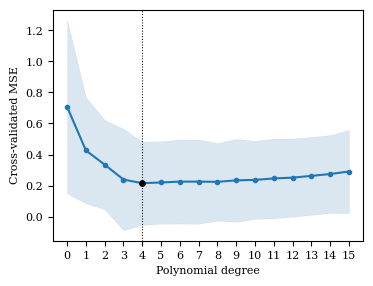

In [97]:
plt.plot(degrees, mse_mean, marker='o', ms=3)

# Plot "confidence interval"
plt.fill_between(degrees, mse_mean-2.0*mse_std, mse_mean+2.0*mse_std, 
    lw=0.25, color='steelblue', alpha=0.2, zorder=-1)

plt.xlabel('Polynomial degree')
plt.ylabel('Cross-validated MSE')
plt.scatter(degrees[imin], mse_mean[imin], s=15, c='black', zorder=100)
plt.xticks(degrees)
plt.axvline(imin, ls=':', lw=0.75, c='black')

#### Plotting the fitted model

We use the function `fit_poly()` to re-fit the model at the optimal $d$ and we plot the predicted values on a uniformly spaced grid of $x$-values.

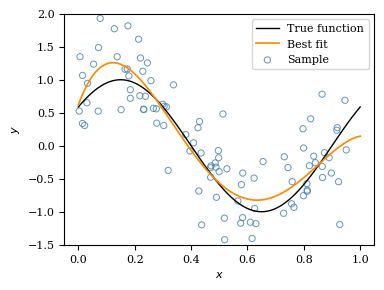

In [98]:
poly, lr = fit_poly(dmin, x[:, None], y)

xvalues = np.linspace(0.0, 1.0, 101)
y_hat = lr.predict(poly.transform(xvalues[:, None]))

xvalues = np.linspace(0.0, 1.0, 101)
plt.plot(xvalues, fcn(xvalues), color='black', lw=1.0, 
    label='True function')
    
plt.plot(xvalues, y_hat, color='darkorange', lw=1.25, 
    zorder=10, label='Best fit')

plt.scatter(x, y, s=20, color='none', edgecolor='steelblue', lw=0.75, 
    alpha=0.8, label='Sample')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim(-1.5, 2.0)
plt.legend(loc='upper right')

### Exercise 5: Automating cross-validation with scikit-learn

#### Creating the sample

We create the sample exactly as in the previous exercise.

In [99]:
import numpy as np

# True function (w/o errors)
def fcn(x):
    return np.sin(2.0 * np.pi * (x + 0.1))

In [100]:
from numpy.random import default_rng

# Initialise random number generator
rng = default_rng(123)

# Sample size
N = 100

# Randomly draw explanatory variable x
x = rng.random(size=N)
epsilon = rng.normal(scale=0.5, size=N)
y = fcn(x) + epsilon

#### Computing the MSE for each hyperparameter

For each $d$, we create a pipeline. Note that step one of the pipeline, polynomial transformation, depends on $d$ so we need to recreate the pipeline in each iteration of the loop!

We then use 
[`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
to compute the MSEs for each split. This replaces the function we implemented in the previous exercise with much
shorter code.

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = np.arange(16)

mse_mean = []
mse_std = []

for d in degrees:

    pipe = make_pipeline(
        PolynomialFeatures(
            degree=d, 
            include_bias=True
        ),
        LinearRegression(fit_intercept=False)
    )

    scores = cross_val_score(
        pipe, 
        x[:, None], y, 
        scoring='neg_mean_squared_error', 
        cv=10
    )

    # Stores contain NEGATIVE MSE
    mse_mean.append(np.mean(-scores))
    mse_std.append(np.std(-scores))


# Convert to NumPy arrays
mse_mean = np.array(mse_mean)
mse_std = np.array(mse_std)

# Print avg MSEs for each degree
mse_mean

array([0.70734493, 0.42671672, 0.33501395, 0.23900256, 0.21559544,
       0.22029082, 0.22568436, 0.22577954, 0.22433218, 0.23387504,
       0.23689982, 0.24623706, 0.25145758, 0.26281712, 0.27462137,
       0.29084427])

The remained of the exercise proceeds in the same way as before. Assuringly, we also find the same results.

In [102]:
imin = np.argmin(mse_mean)
dmin = degrees[imin]

print(f'Polynomial degree with min. MSE: {dmin}')

Polynomial degree with min. MSE: 4


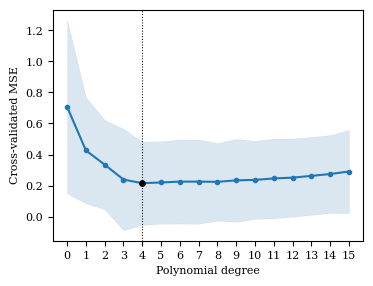

In [103]:
plt.plot(degrees, mse_mean, marker='o', ms=3)

plt.fill_between(degrees, mse_mean-2.0*mse_std, mse_mean+2.0*mse_std, 
    lw=0.25, color='steelblue', alpha=0.2, zorder=-1)

plt.xlabel('Polynomial degree')
plt.ylabel('Cross-validated MSE')
plt.scatter(degrees[imin], mse_mean[imin], s=15, c='black', zorder=100)
plt.xticks(degrees)
plt.axvline(imin, ls=':', lw=0.75, c='black')

### Exercise 6: Optimising hyperparameters with validation curves

#### Creating the sample

We create the sample in the same way we did in exercises 4 and 5.

In [104]:
import numpy as np

# True function (w/o errors)
def fcn(x):
    return np.sin(2.0 * np.pi * (x + 0.1))

In [105]:
from numpy.random import default_rng

# Initialise random number generator
rng = default_rng(123)

# Sample size
N = 100

# Randomly draw explanatory variable x
x = rng.random(size=N)
epsilon = rng.normal(scale=0.5, size=N)
y = fcn(x) + epsilon

#### Computing the MSE for each hyperparameter

To use 
[`validation_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html),
we need to correctly specify the `param_name` argument. In our case this is given by 
`'polynomialfeatures__degree'` since we are asking the function to vary the argument `degree` of the pipeline step called
`polynomialfeatures`. Note that the `__` serves as a delimiter between the pipeline step name and the argument name.

In [106]:
from sklearn.model_selection import validation_curve

# Set of polynomial degrees to cross-validate
degrees = np.arange(16)

# Create pipeline. The degree value does not matter at this point, will be
# automatically updated.
pipe = make_pipeline(
    PolynomialFeatures(
        degree=0, 
        include_bias=True
    ),
    LinearRegression(fit_intercept=False)
)

# Compute the MSEs for each degree and each split, returning arrays of 
# size 15 x 10.
train_scores, test_scores = validation_curve(
    estimator=pipe,
    X=x[:, None], y=y,
    param_name='polynomialfeatures__degree',
    param_range=degrees,
    scoring='neg_mean_squared_error', 
    cv=10
)

# Compute mean and std for each degree (scored returned by function are 
# NEGATIVE MSEs)
mse_mean = np.mean(-test_scores, axis=1)
mse_std = np.std(-test_scores, axis=1)

The remainder of this exercise proceeds as before.

In [107]:
imin = np.argmin(mse_mean)
dmin = degrees[imin]

print(f'Polynomial degree with min. MSE: {dmin}')

Polynomial degree with min. MSE: 4


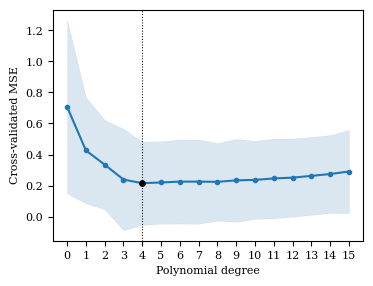

In [108]:
plt.plot(degrees, mse_mean, marker='o', ms=3)

plt.fill_between(degrees, mse_mean-2.0*mse_std, mse_mean+2.0*mse_std, 
    lw=0.25, color='steelblue', alpha=0.2, zorder=-1)

plt.xlabel('Polynomial degree')
plt.ylabel('Cross-validated MSE')
plt.scatter(degrees[imin], mse_mean[imin], s=15, c='black', zorder=100)
plt.xticks(degrees)
plt.axvline(imin, ls=':', lw=0.75, c='black')